해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

In [477]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [478]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [479]:
cus_cluster = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/연체정보추가.csv', encoding='cp949')

In [480]:
대출건수 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='대출건수',encoding='cp949')
대출금액 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='대출금액',encoding='cp949')


연체건수 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='연체건수',encoding='cp949')
연체금액 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='연체금액',encoding='cp949')

In [481]:
#cus_cluster = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/정상비정상그룹비교_feature_extraction.csv', encoding='cp949')

In [483]:
cus_cluster.columns

Index(['나이', '대출건수_5개월_1', '대출건수_5개월_3', '대출건수_5개월_5', '대출건수_5개월_6',
       '대출건수_5개월_8', '대출건수_5개월_17', '대출건수_5개월_21', '대출건수_5개월_98', '대출금액_5개월_1',
       ...
       '연체금액_5개월_299', '연체금액_5개월_801', '연체금액_5개월_1101', '연체금액_5개월_1201',
       '연체금액_5개월_1301', '연체금액_5개월_9997', '연체금액_5개월_9998', '총연체금액', '총연체건수',
       '성별'],
      dtype='object', length=105)

In [484]:
cus_cluster = cus_cluster[cus_cluster.연체여부==1]

In [485]:
cus_cluster.reset_index(inplace=True)

In [486]:
cus_cluster.drop(columns=['index'],inplace=True)

In [487]:
len(cus_cluster)

3449

In [488]:
cus_cluster.drop(columns=['연체여부'], inplace=True)

In [489]:
나이 = cus_cluster[['나이']]

In [490]:
len(연체금액)

3449

In [492]:
#총대출건수 대비 OO대출건수 비율
대출건수= 대출건수.div(대출건수.총대출건수, axis=0)

In [493]:
대출금액= 대출금액.div(대출금액.총대출금액, axis=0)
연체건수= 연체건수.div(연체건수.총연체건수, axis=0)
연체금액= 연체금액.div(연체금액.총연체금액, axis=0)

In [494]:
나이.head()

나이
0  46
1  41
2  62
3  58
4  33

In [495]:
cus_cluster = pd.concat([나이,대출건수,대출금액,연체건수,연체금액],axis=1)

In [496]:
cus_cluster= cus_cluster.fillna(0)

In [497]:
#이상치 처리
def cap_data(df):
    for col in df.columns:
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')) :
            percentiles = df[col].quantile([0.01,0.9]).values
            df[col][df[col]>= percentiles[1]] = percentiles[1]
        
        else:
            df[col] = df[col]
    return df

In [499]:
cus_cluster = cap_data(cus_cluster)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [500]:
cus_info2= cus_cluster

In [502]:
corr = cus_cluster.corr(method='pearson')

# Cluster 3 or 4

In [504]:
data=cus_cluster

In [505]:
corr = data.corr(method='pearson')

In [506]:
drop50 = [column for column in corr.columns if any((corr[column] >= 0.5))]

In [507]:
data = cus_cluster[drop50]

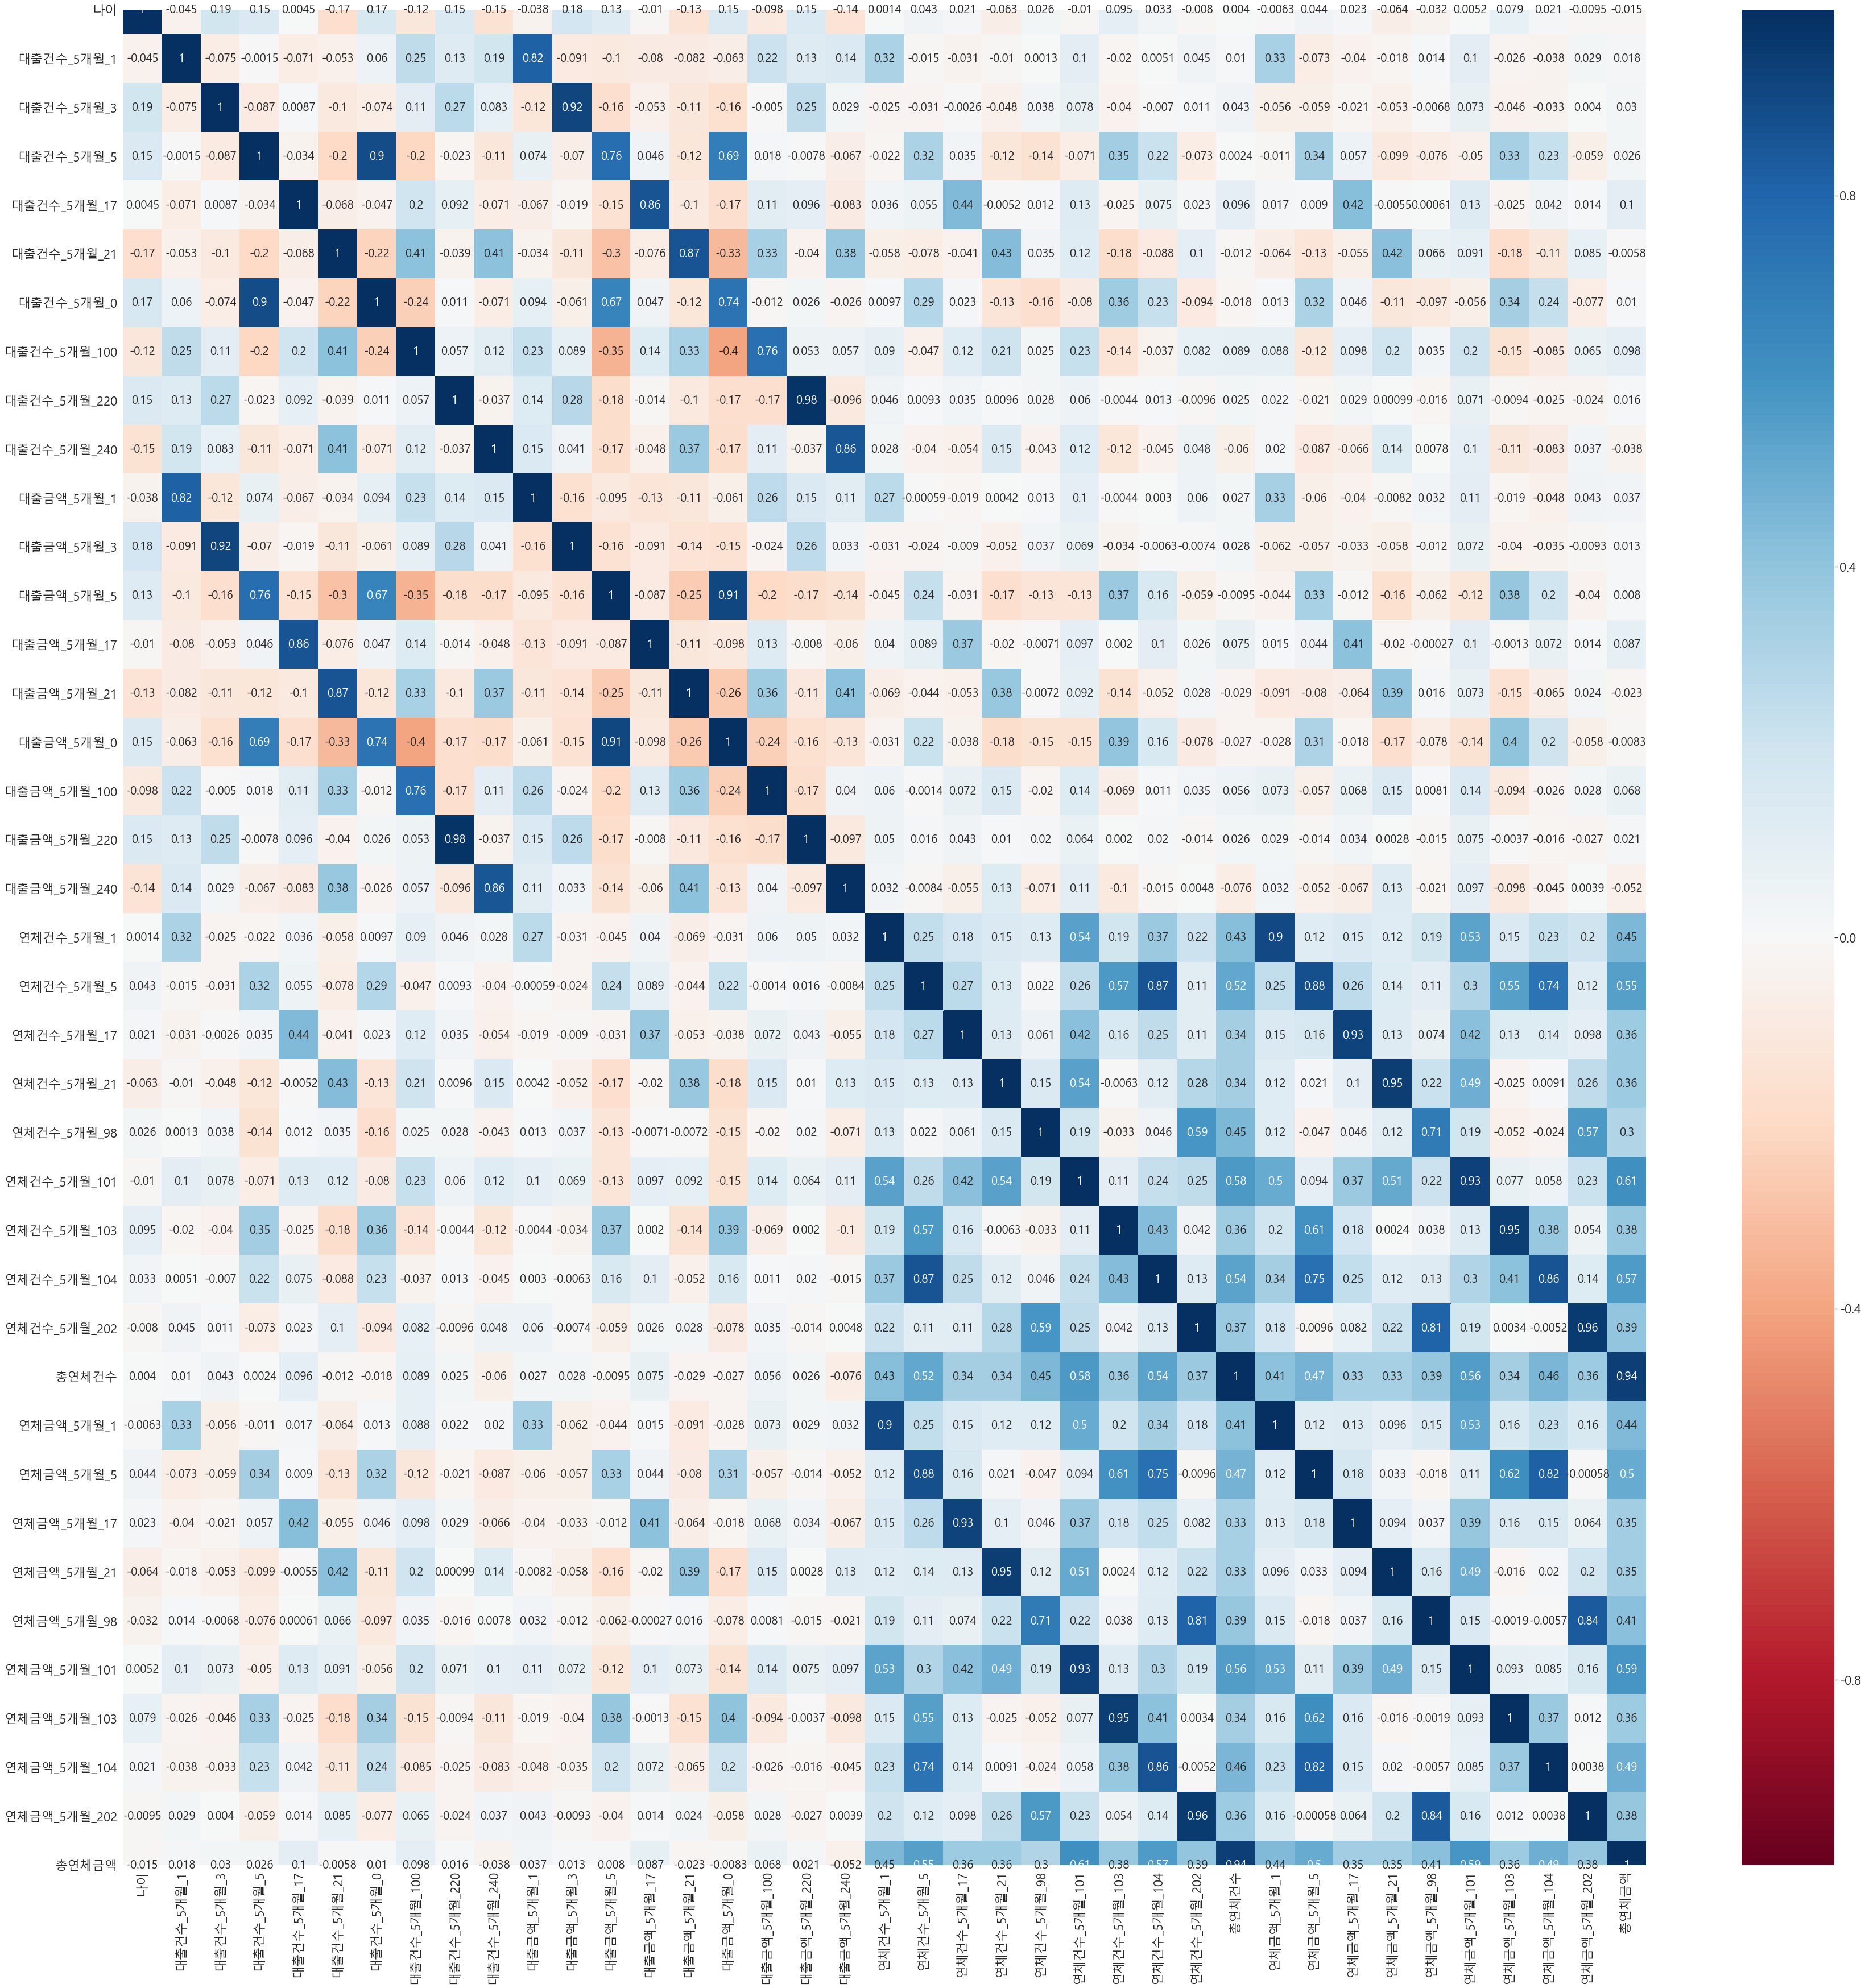

In [78]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False
data_corr = data.corr(method='pearson')
plt.figure(figsize = (60,60))
ax = sns.heatmap(data_corr,annot=True,vmin=-1, vmax=1, cmap = 'RdBu',annot_kws={'size':20})
#sns.set(font_scale=2)
plt.show()

In [79]:
print(data.columns.to_list())

['나이', '대출건수_5개월_1', '대출건수_5개월_3', '대출건수_5개월_5', '대출건수_5개월_17', '대출건수_5개월_21', '대출건수_5개월_0', '대출건수_5개월_100', '대출건수_5개월_220', '대출건수_5개월_240', '대출금액_5개월_1', '대출금액_5개월_3', '대출금액_5개월_5', '대출금액_5개월_17', '대출금액_5개월_21', '대출금액_5개월_0', '대출금액_5개월_100', '대출금액_5개월_220', '대출금액_5개월_240', '연체건수_5개월_1', '연체건수_5개월_5', '연체건수_5개월_17', '연체건수_5개월_21', '연체건수_5개월_98', '연체건수_5개월_101', '연체건수_5개월_103', '연체건수_5개월_104', '연체건수_5개월_202', '총연체건수', '연체금액_5개월_1', '연체금액_5개월_5', '연체금액_5개월_17', '연체금액_5개월_21', '연체금액_5개월_98', '연체금액_5개월_101', '연체금액_5개월_103', '연체금액_5개월_104', '연체금액_5개월_202', '총연체금액']


In [508]:
data.drop(columns=['연체건수_5개월_1', '연체건수_5개월_5', '연체건수_5개월_17', '연체건수_5개월_21', '연체건수_5개월_98', '연체건수_5개월_101', '연체건수_5개월_103', '연체건수_5개월_104', '연체건수_5개월_202', '연체금액_5개월_1', '연체금액_5개월_5', '연체금액_5개월_17', '연체금액_5개월_21', '연체금액_5개월_98', '연체금액_5개월_101', '연체금액_5개월_103', '연체금액_5개월_104', '연체금액_5개월_202'],
                 inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


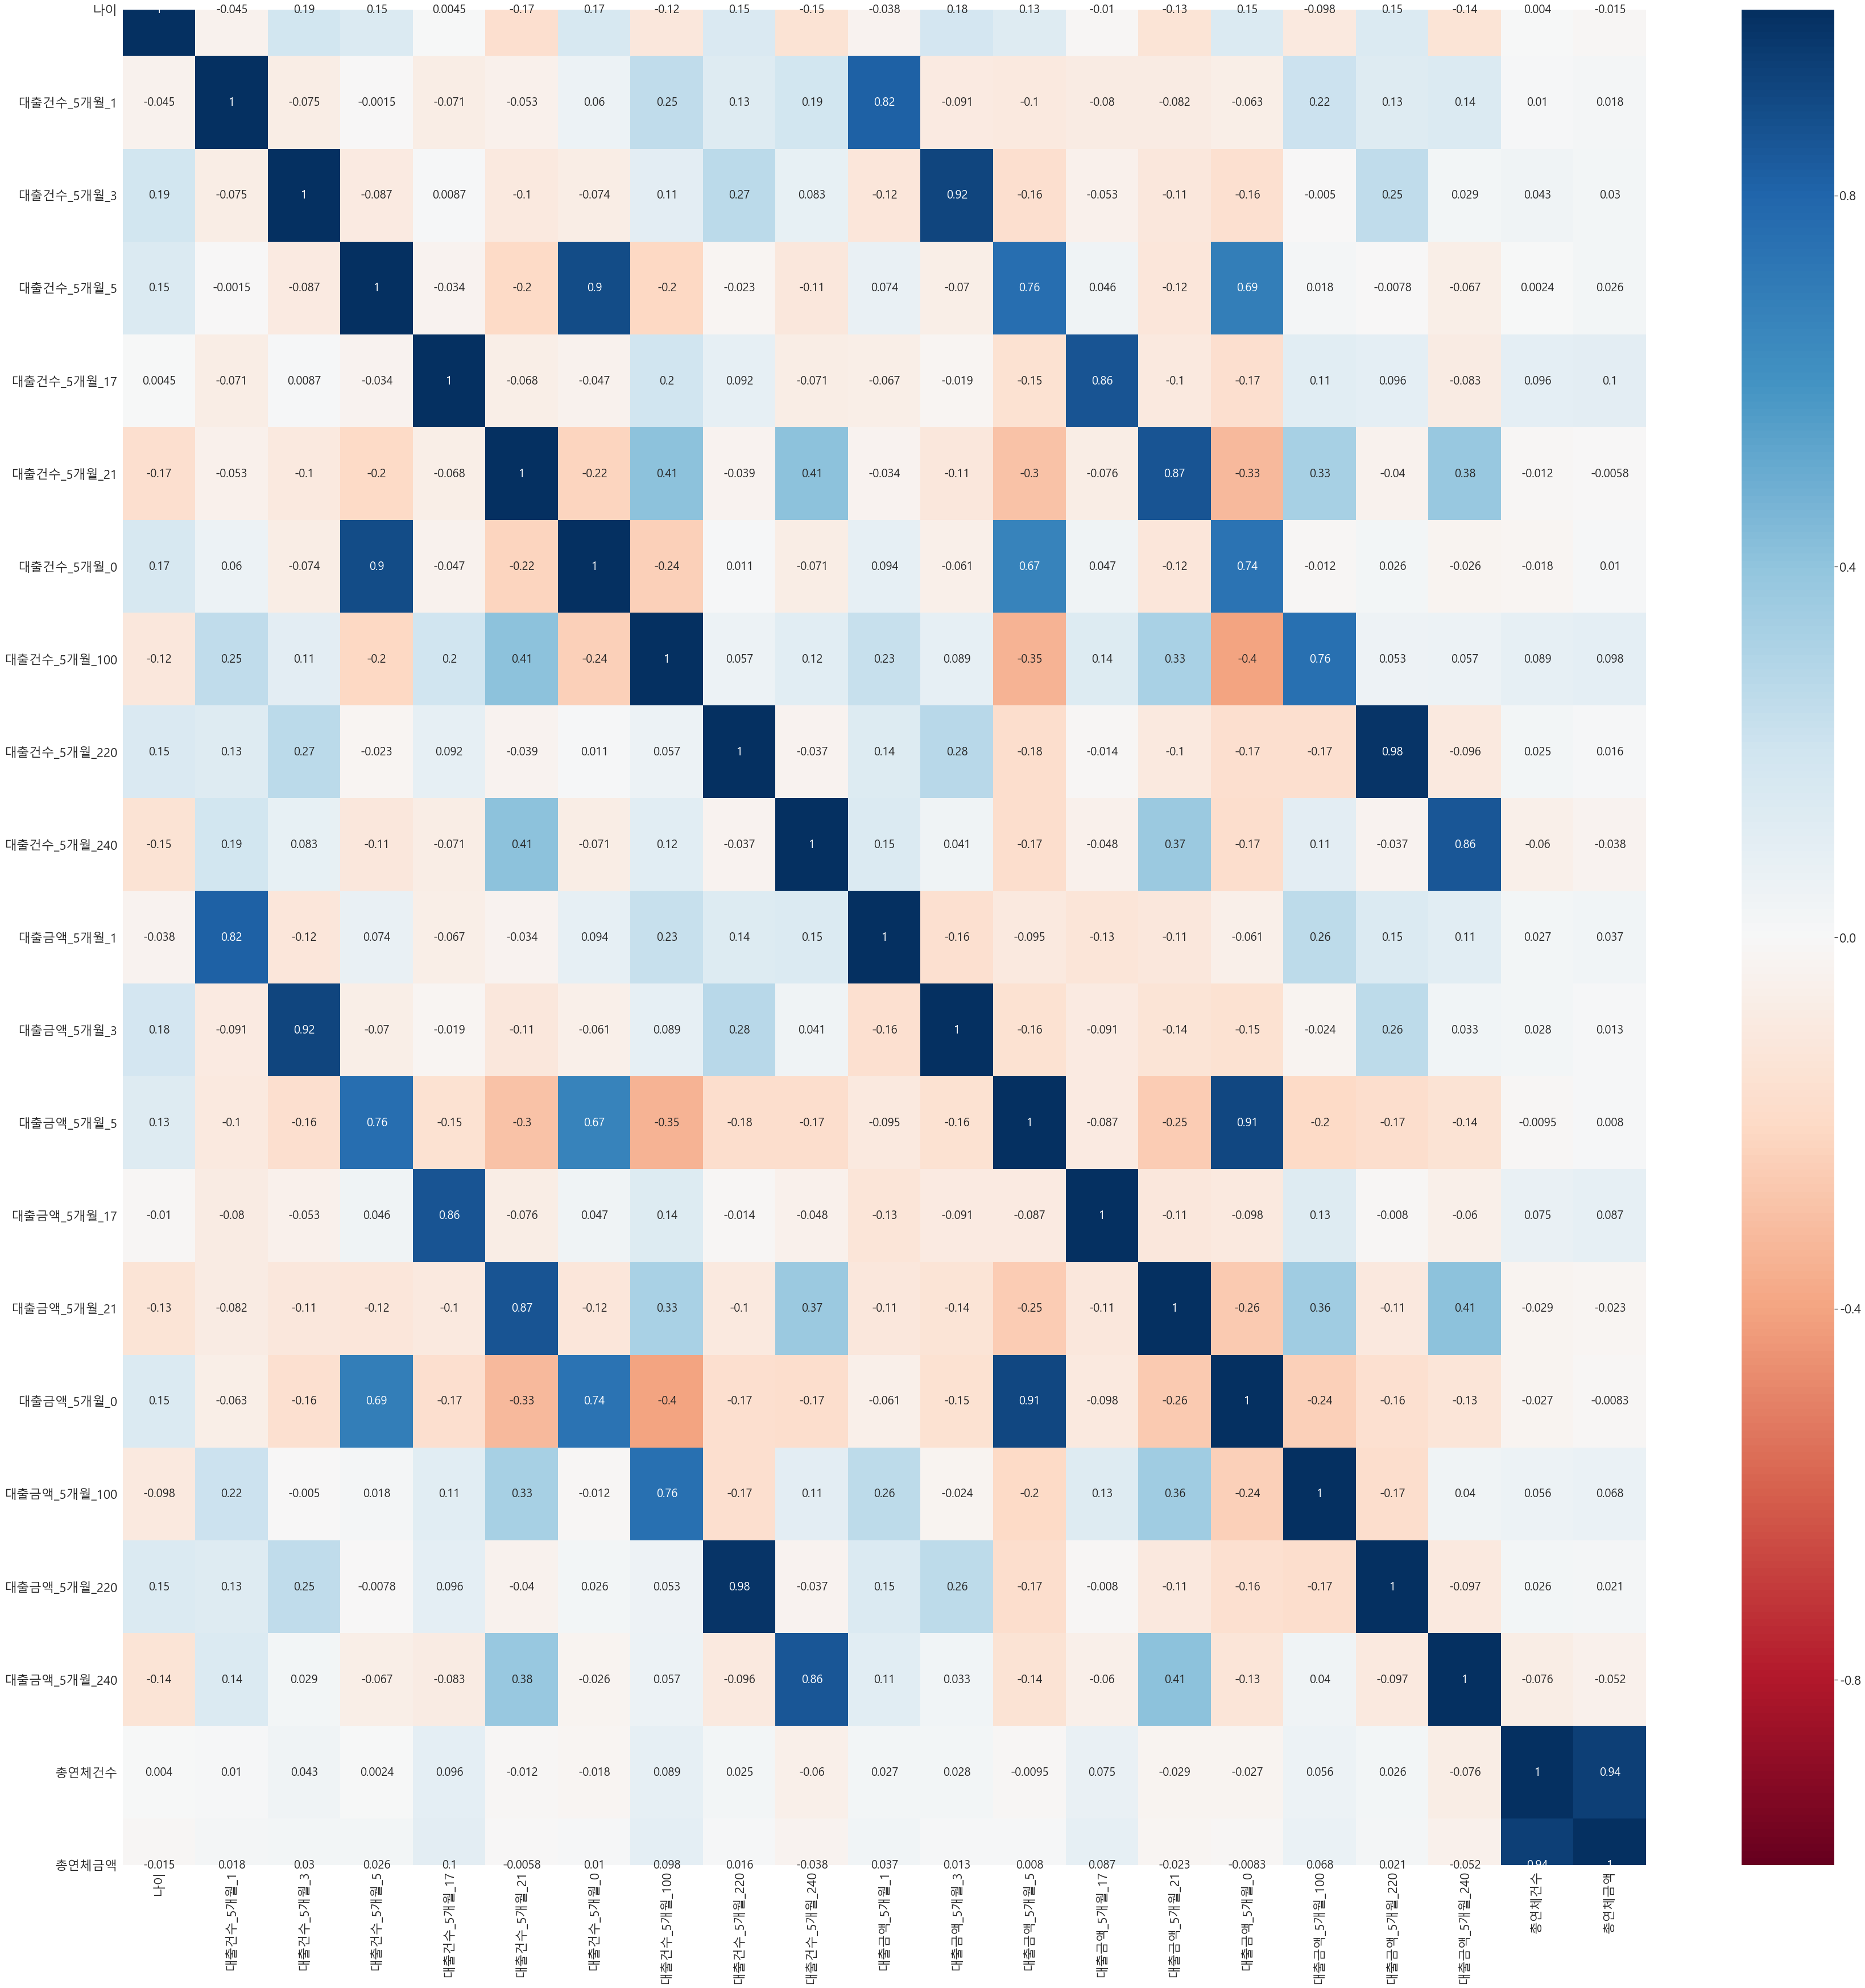

In [85]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False
data_corr = data.corr(method='pearson')
plt.figure(figsize = (60,60))
ax = sns.heatmap(data_corr,annot=True,vmin=-1, vmax=1, cmap = 'RdBu',annot_kws={'size':20})
#sns.set(font_scale=2)
plt.show()

대출건수_5개월_1, 대출금액_5개월_1,  3.5.17.21.0.100.220.240.

In [509]:
data.drop(columns=['대출건수_5개월_5', '대출건수_5개월_21','대출건수_5개월_17','대출건수_5개월_0','대출건수_5개월_100','대출건수_5개월_220','대출건수_5개월_240','총연체건수'],inplace=True)

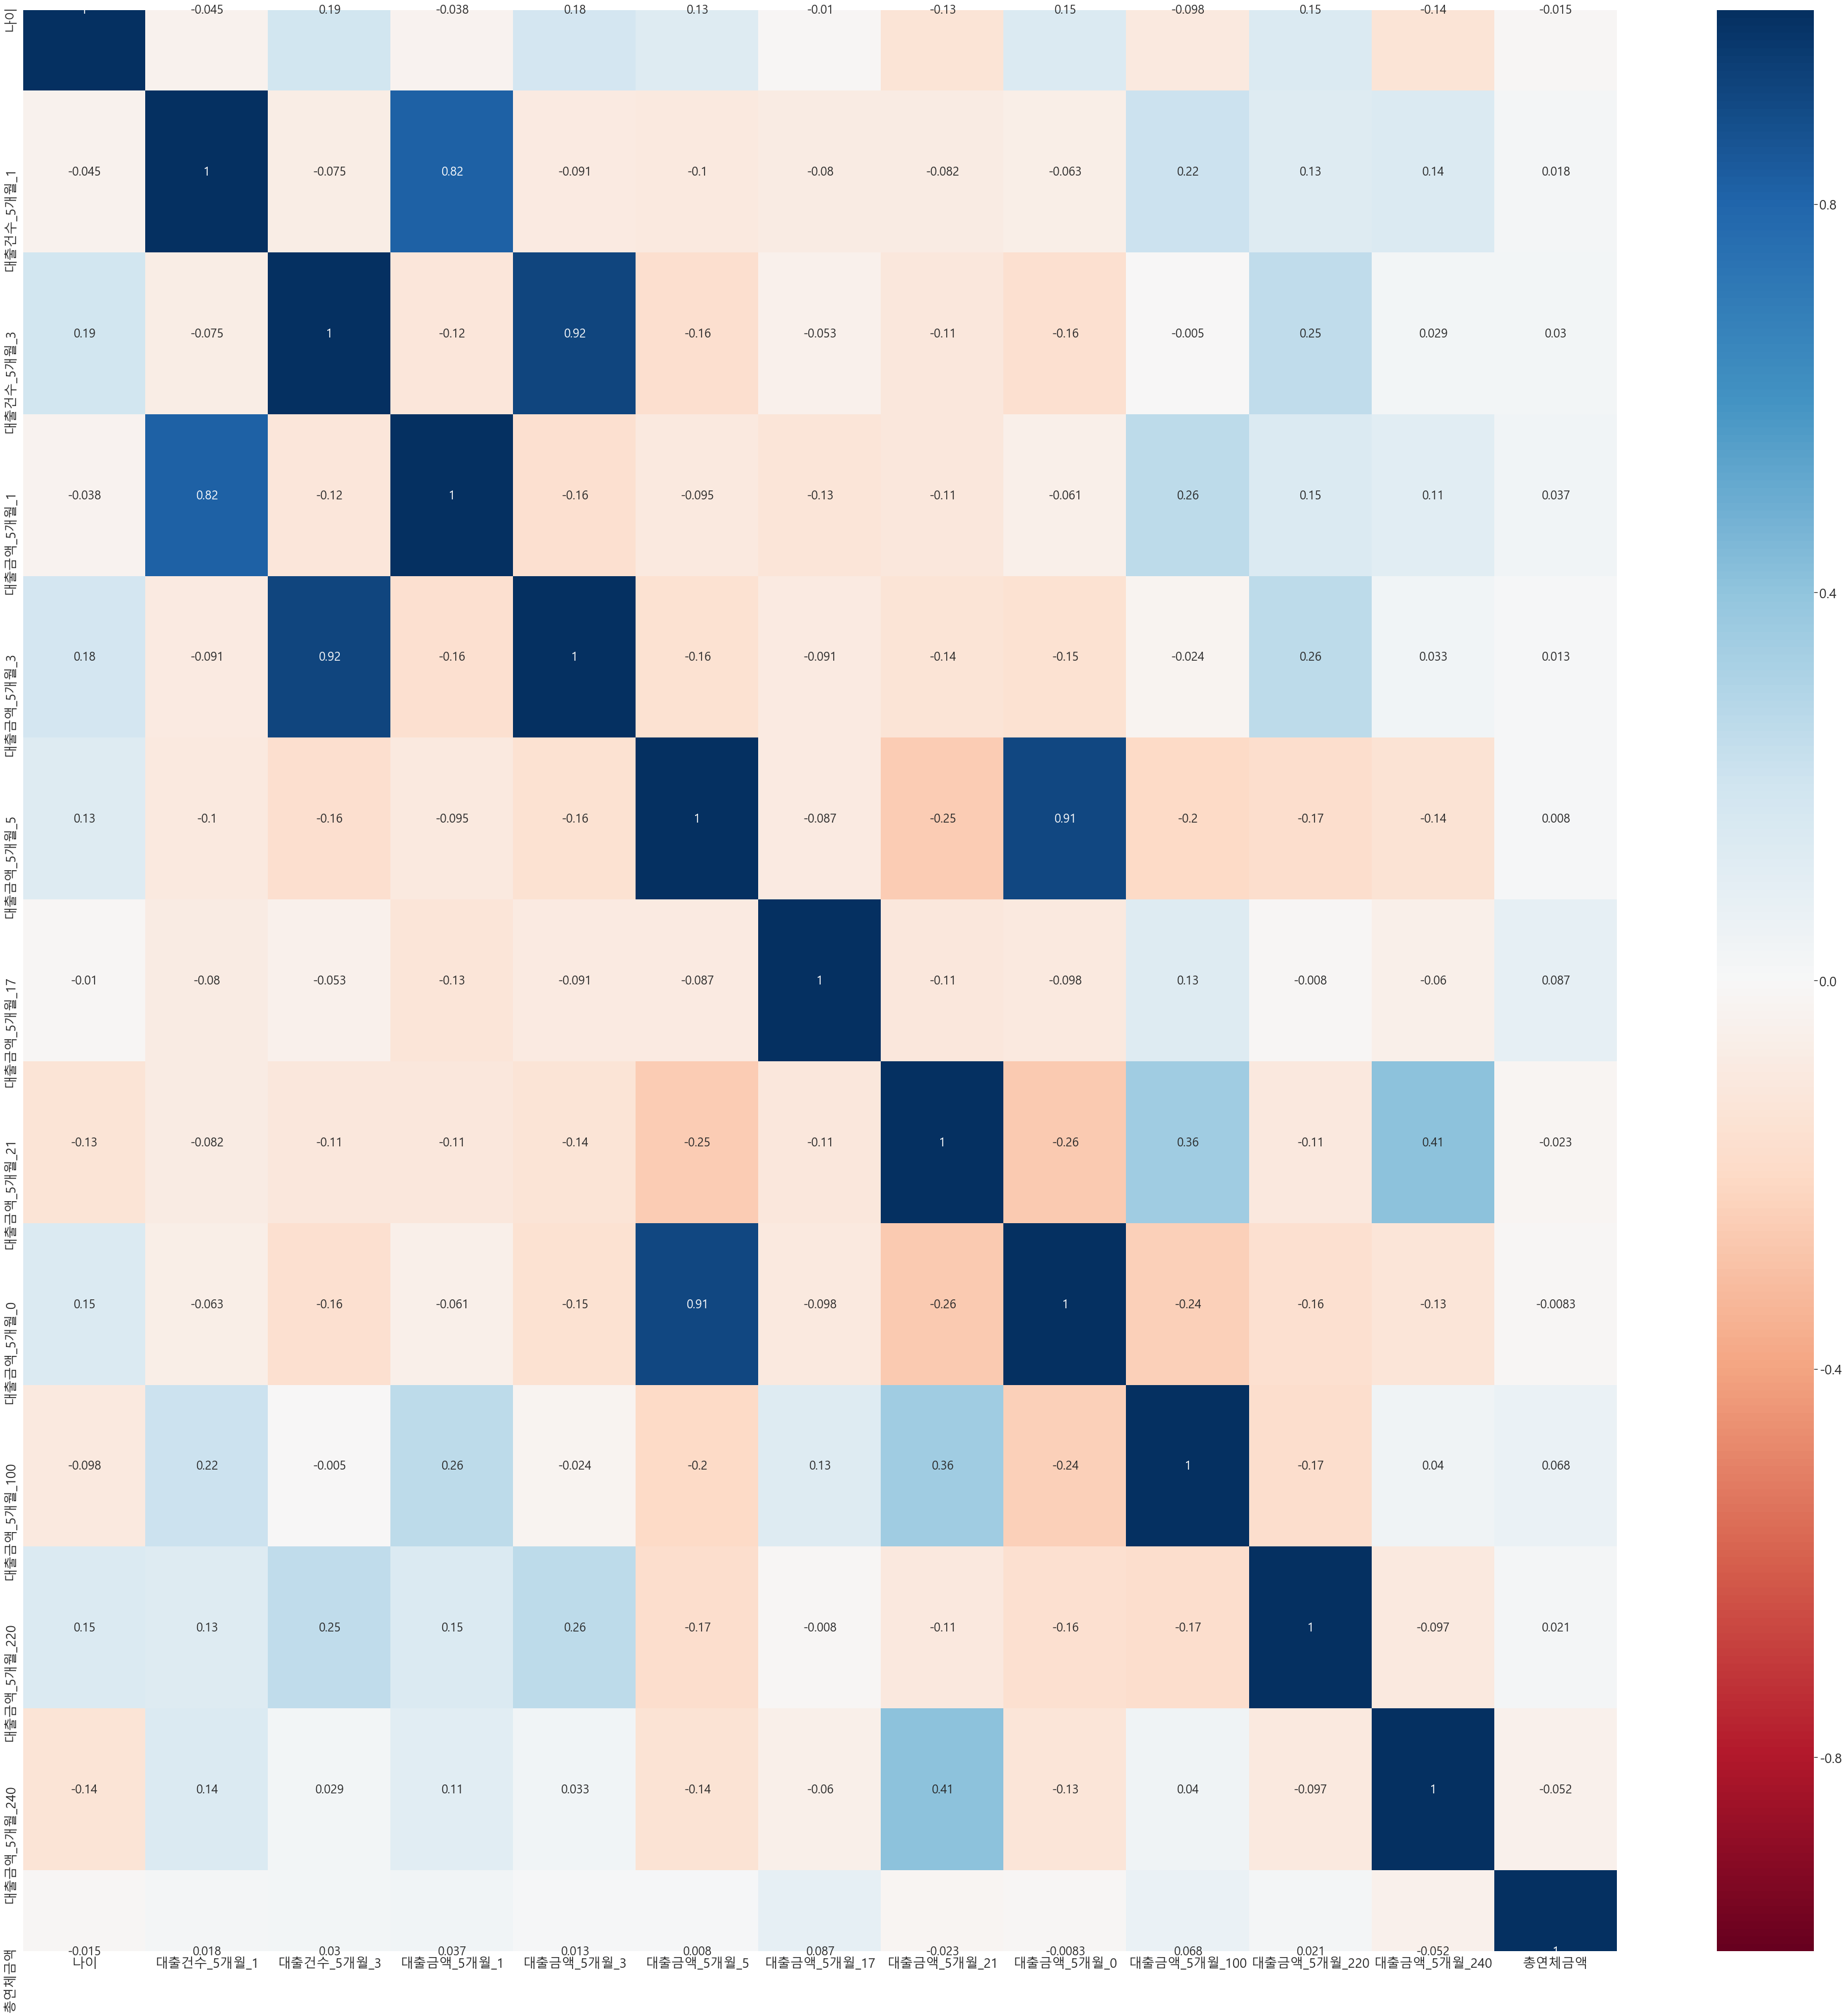

In [87]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False
data_corr = data.corr(method='pearson')
plt.figure(figsize = (60,60))
ax = sns.heatmap(data_corr,annot=True,vmin=-1, vmax=1, cmap = 'RdBu',annot_kws={'size':20})
#sns.set(font_scale=2)
plt.show()

In [510]:
data.drop(columns=['대출금액_5개월_5','대출건수_5개월_3'], inplace=True)

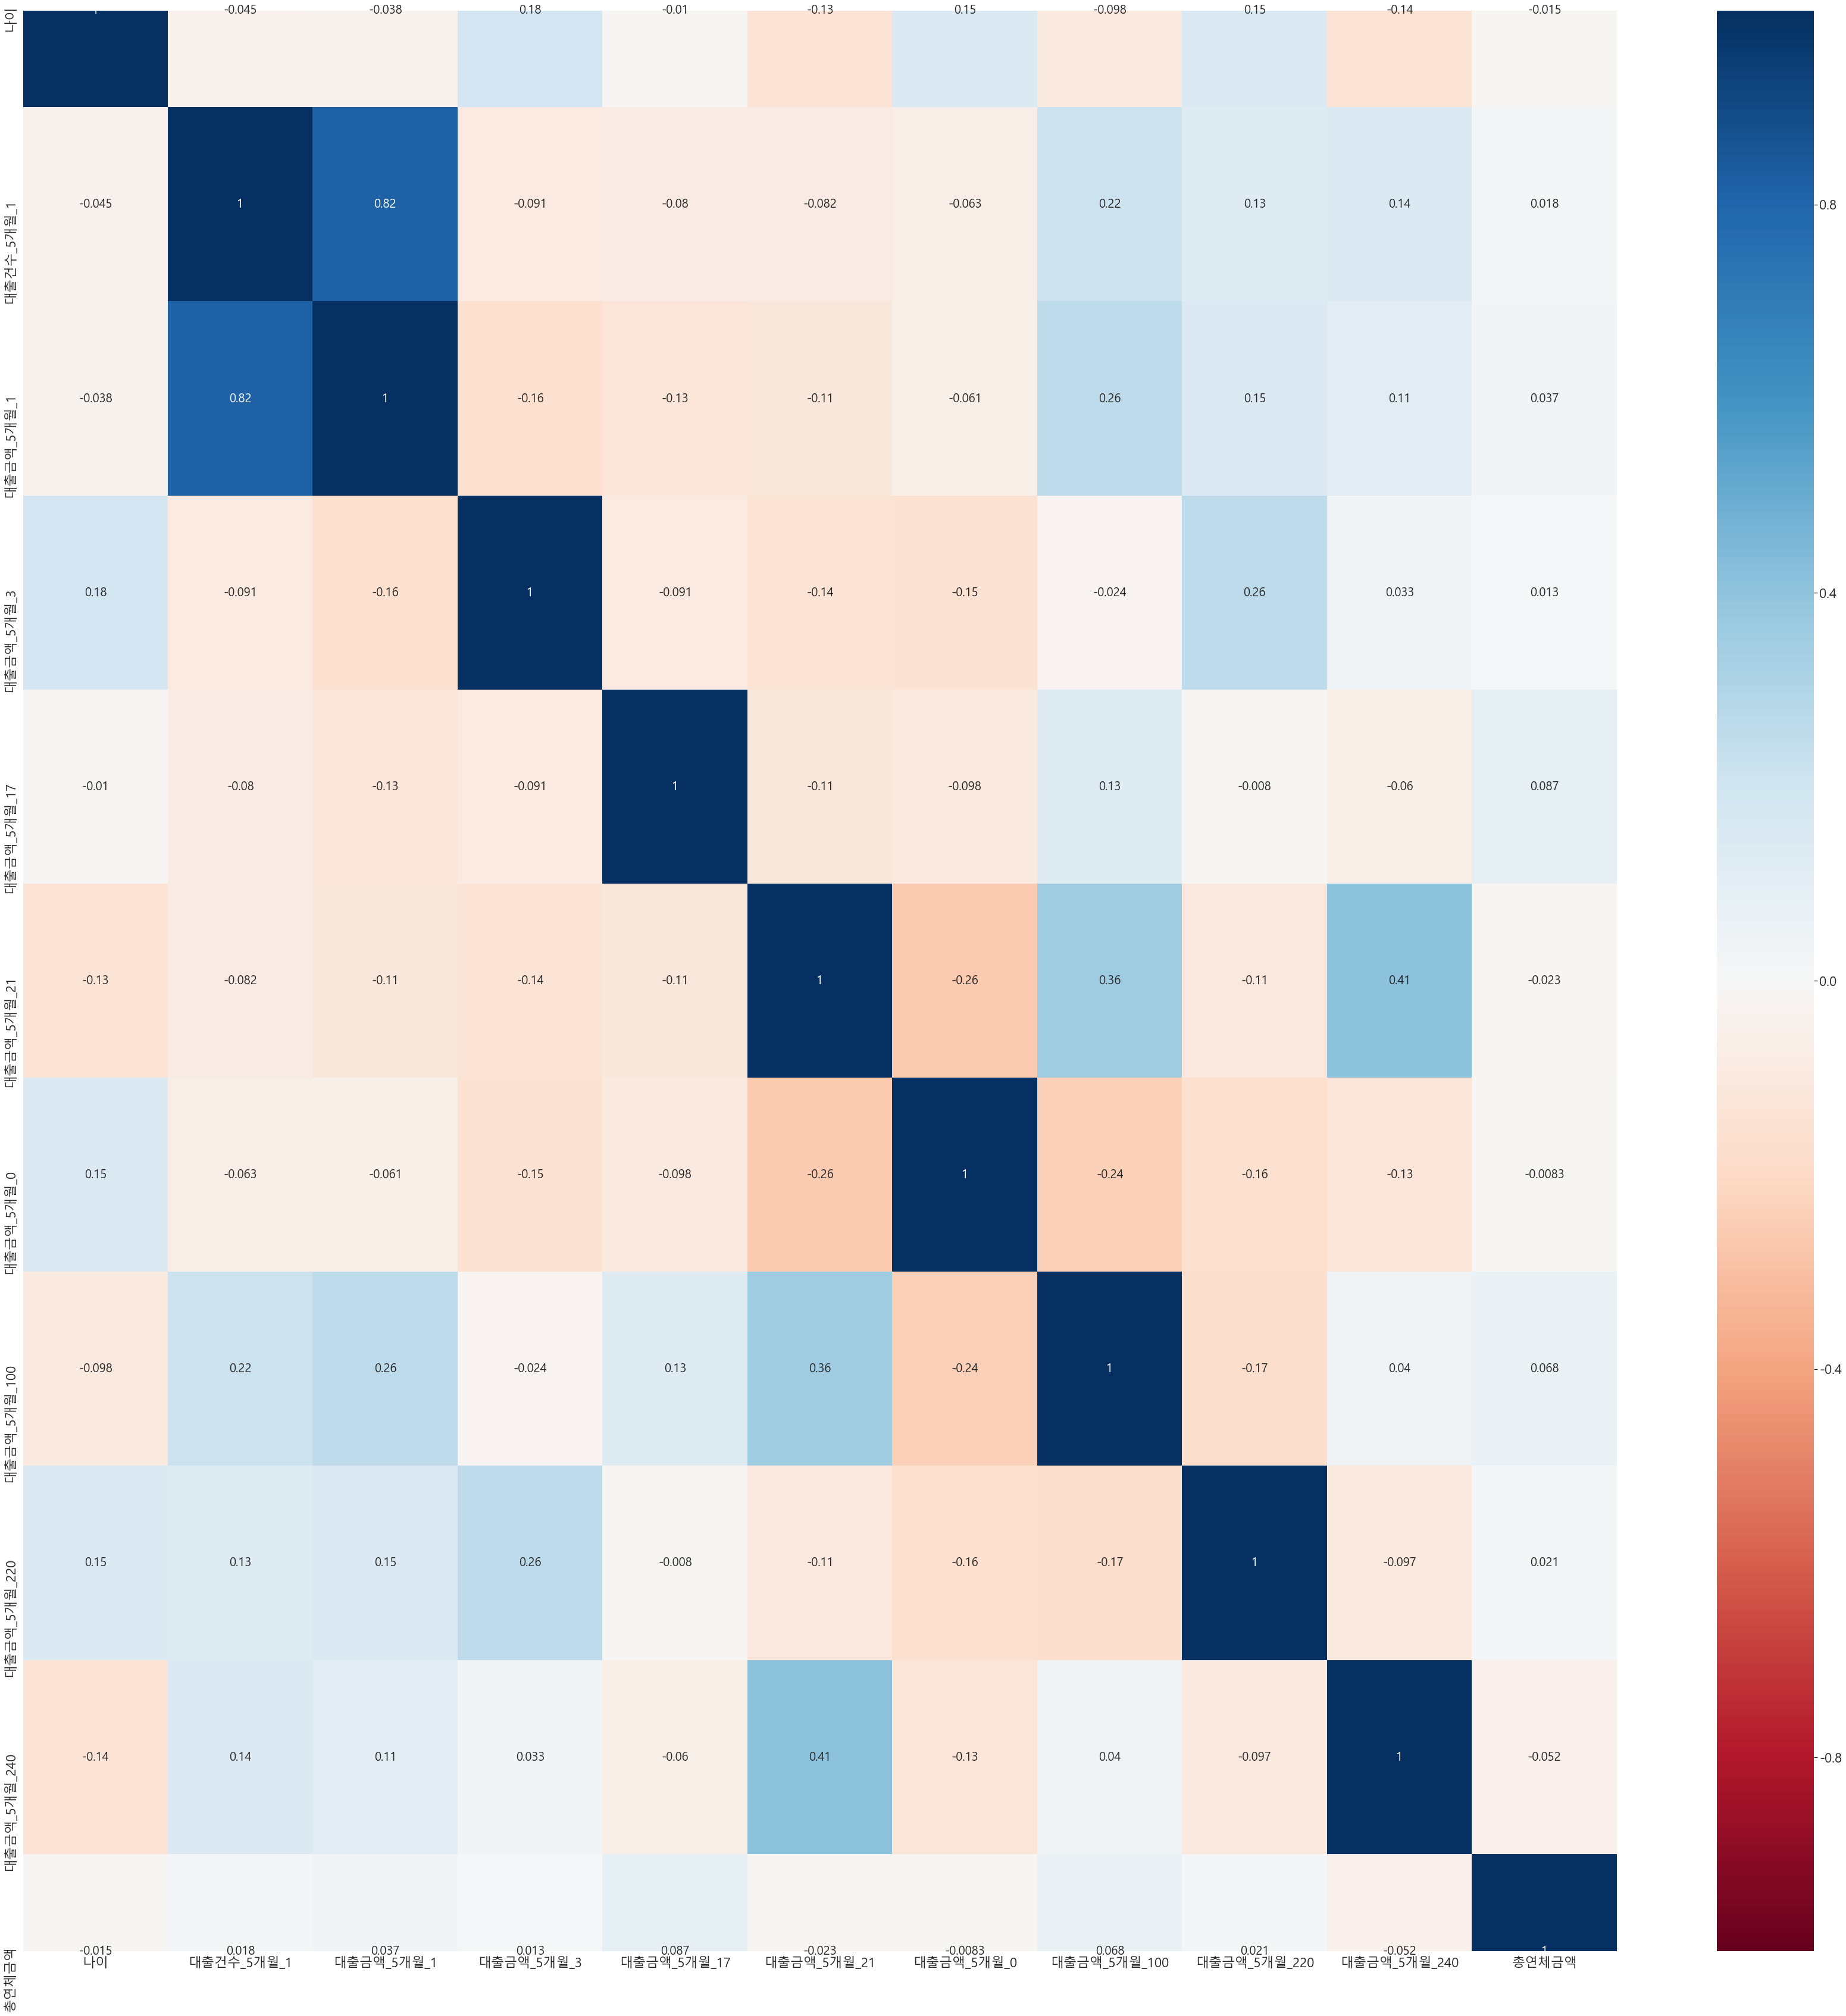

In [90]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False
data_corr = data.corr(method='pearson')
plt.figure(figsize = (60,60))
ax = sns.heatmap(data_corr,annot=True,vmin=-1, vmax=1, cmap = 'RdBu',annot_kws={'size':20})
#sns.set(font_scale=2)
plt.show()

In [511]:
data.drop(columns=['대출건수_5개월_1'],
                 inplace=True)

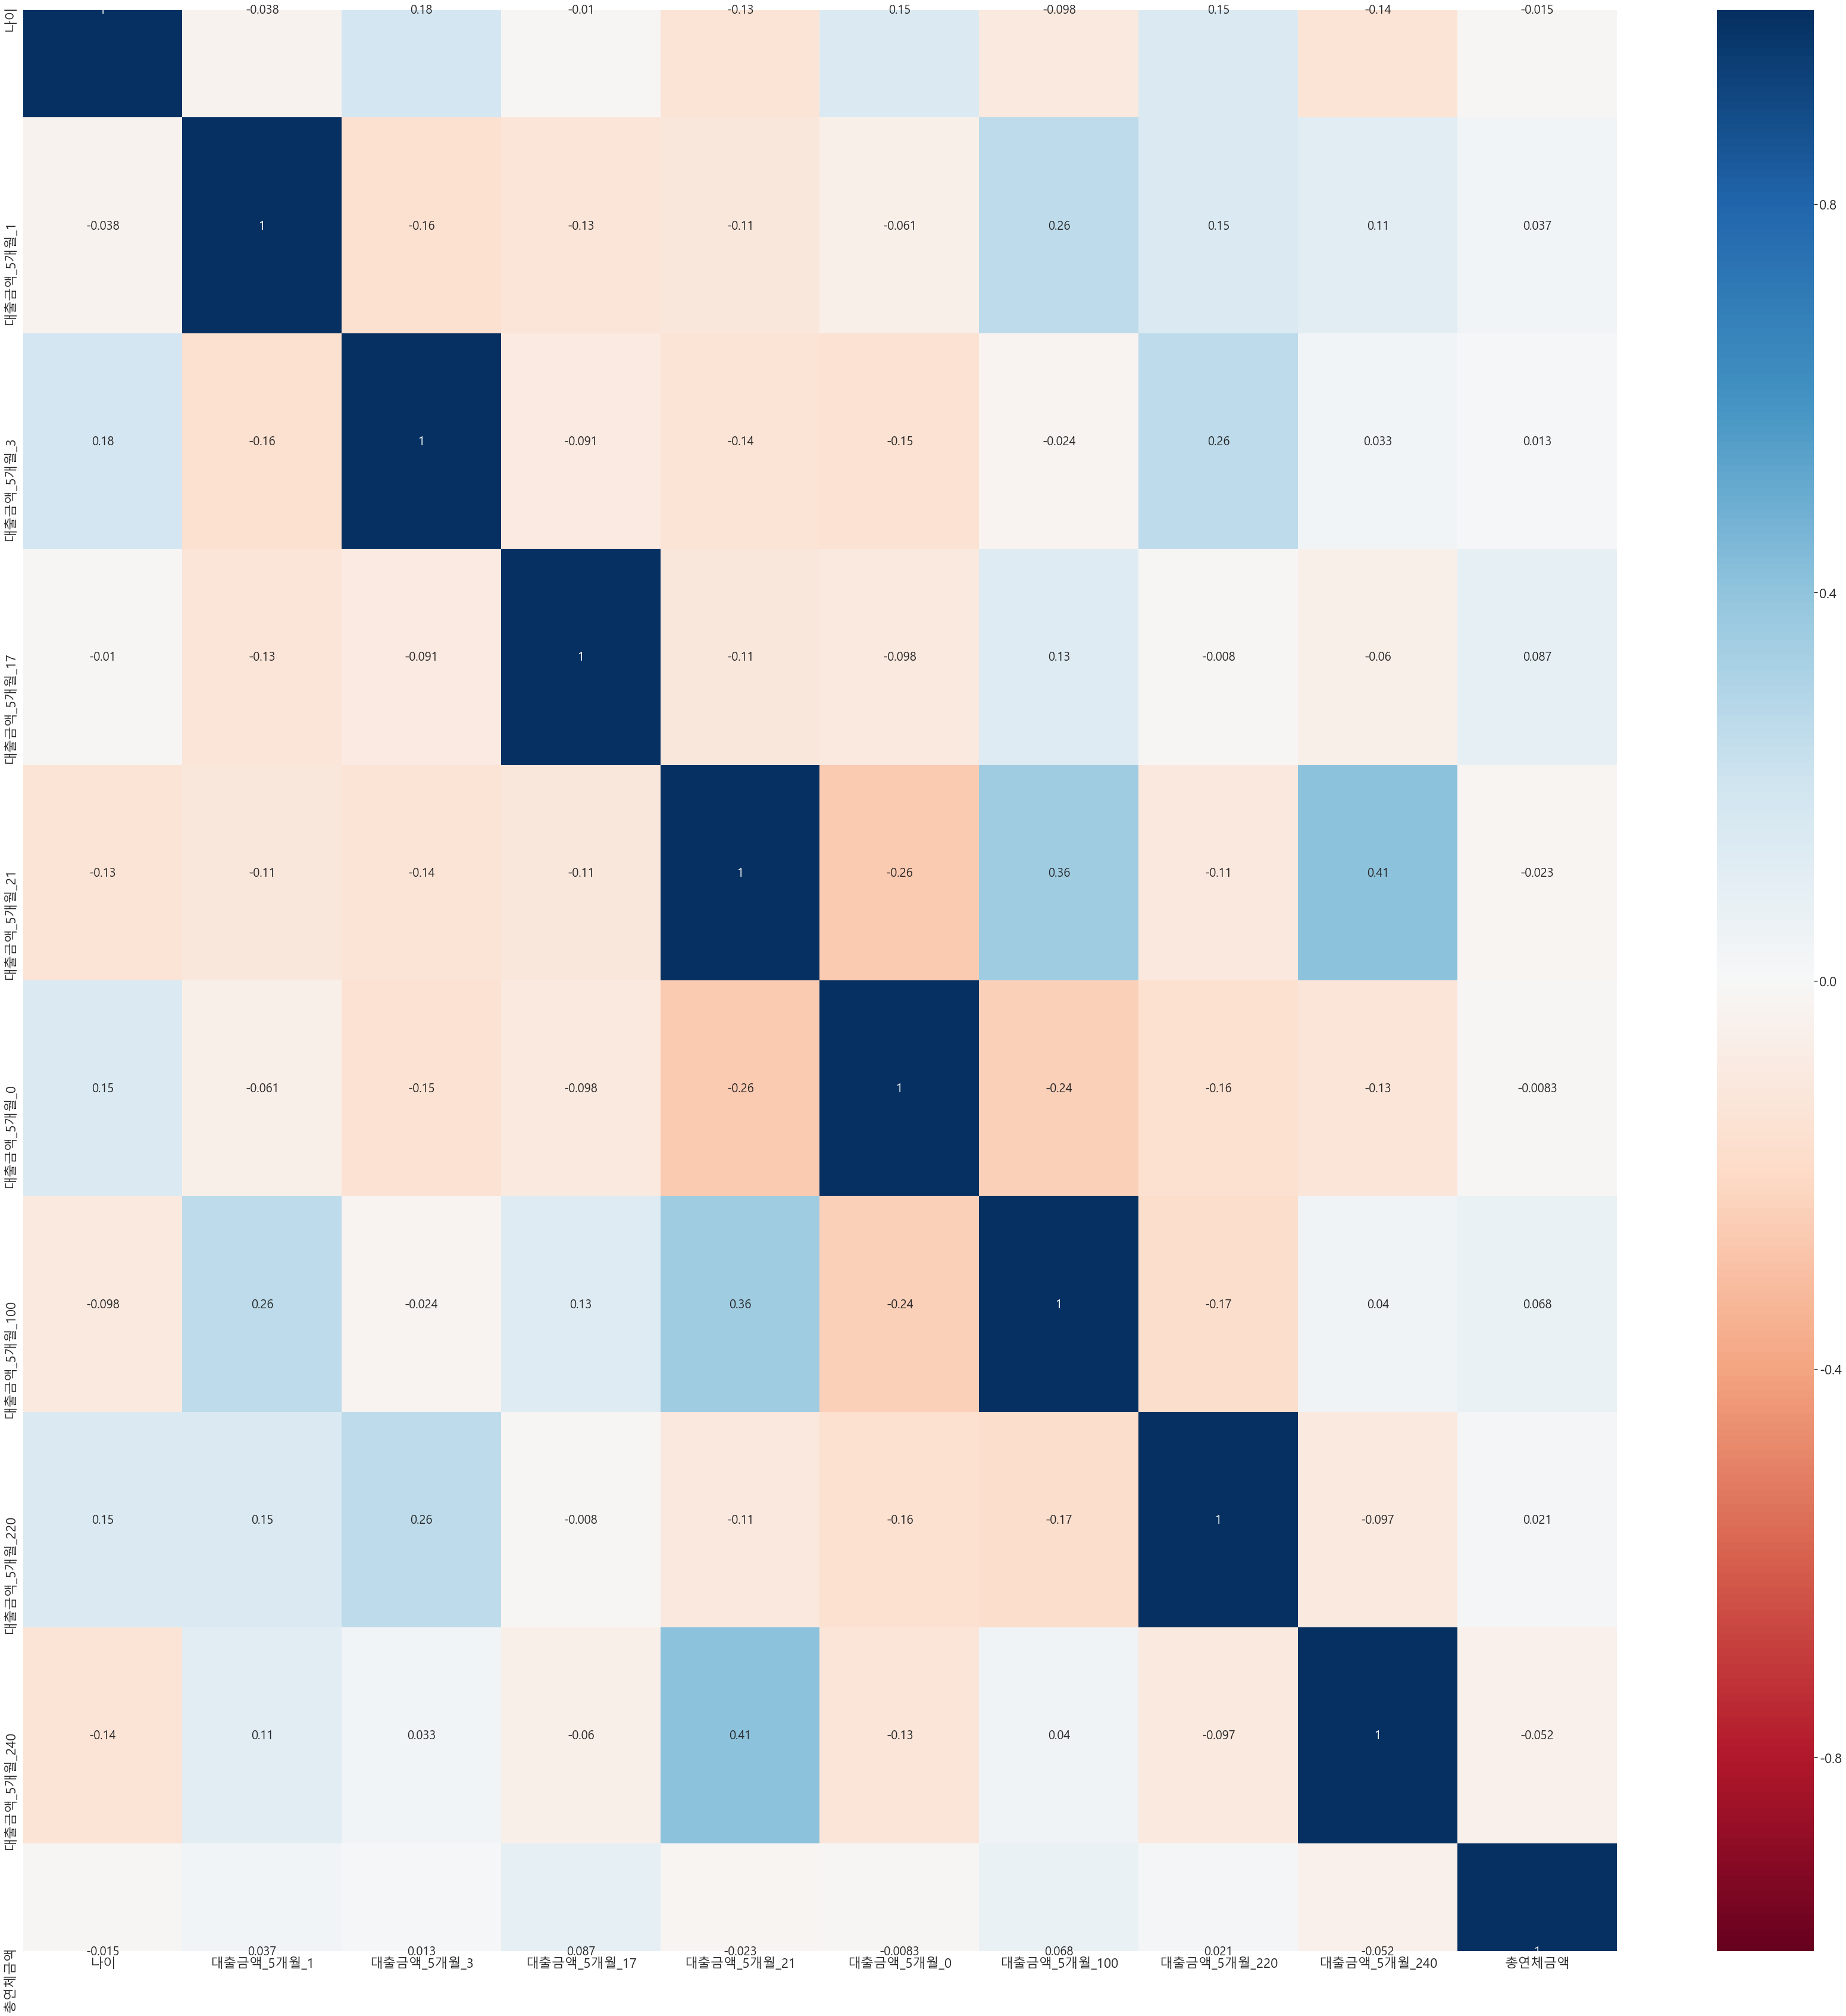

In [92]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False
data_corr = data.corr(method='pearson')
plt.figure(figsize = (60,60))
ax = sns.heatmap(data_corr,annot=True,vmin=-1, vmax=1, cmap = 'RdBu',annot_kws={'size':20})
#sns.set(font_scale=2)
plt.show()

In [512]:
data.columns

Index(['나이', '대출금액_5개월_1', '대출금액_5개월_3', '대출금액_5개월_17', '대출금액_5개월_21',
       '대출금액_5개월_0', '대출금액_5개월_100', '대출금액_5개월_220', '대출금액_5개월_240', '총연체금액'],
      dtype='object')

In [513]:
cus_cluster = cus_cluster[data.columns]

In [408]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans

In [409]:
cus_cluster.isnull().sum()

나이              0
대출금액_5개월_1      0
대출금액_5개월_3      0
대출금액_5개월_17     0
대출금액_5개월_21     0
대출금액_5개월_0      0
대출금액_5개월_100    0
대출금액_5개월_220    0
대출금액_5개월_240    0
총연체금액           0
dtype: int64

In [410]:
std = StandardScaler()
X_std = std.fit_transform(cus_cluster)

<function matplotlib.pyplot.show(*args, **kw)>

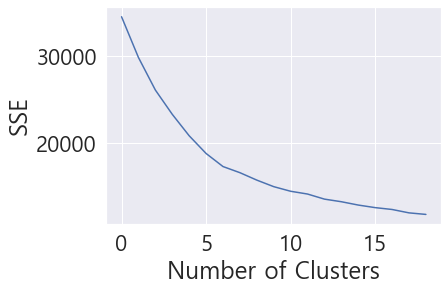

In [411]:
sse=[]
for k in range(1,20):
    
    kmeans = KMeans(n_clusters=k, random_state=777, max_iter=50)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.plot(sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

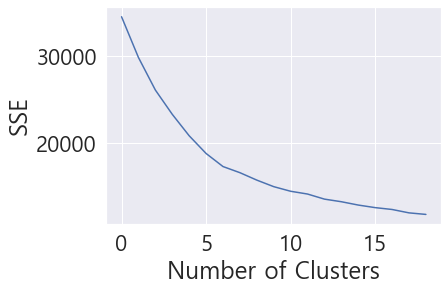

In [313]:
sse=[]
for k in range(1,20):
    
    kmeans = KMeans(n_clusters=k, random_state=777, max_iter=50)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.plot(sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show

# Cluster 4

In [521]:
cus = cus_cluster

In [522]:
cus_info = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/연체정보추가.csv', encoding='cp949')

In [524]:
cus_info = cus_info[cus_info.연체여부==1]

In [525]:
len(cus_info)

3449

In [528]:
model = KMeans(n_clusters=4, random_state=77, 
               max_iter=50).fit(X_std)
label = model.labels_
pd.value_counts(label)

0    1308
1     905
2     863
3     373
dtype: int64

In [530]:
cus_info2['cluster'] = label+1

In [468]:
cus['cluster'] = label+1
cus_info['cluster'] = label+1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [268]:
from sklearn.manifold import TSNE

In [269]:
Y=TSNE(n_components=2,perplexity=30).fit_transform(cus_cluster)

In [270]:
data1=pd.DataFrame()
data1['y1'] = Y[:,0]
data1['y2'] = Y[:,1]

In [271]:
data1['cluster']=label+1

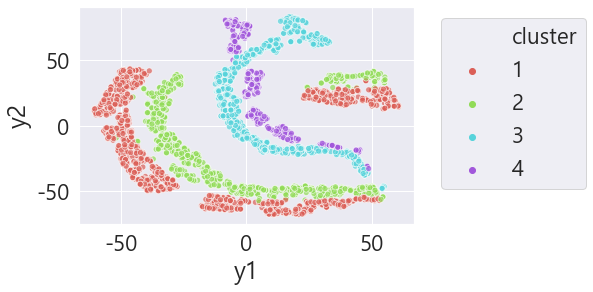

In [117]:
sns.scatterplot(x='y1',
               y='y2',
               hue='cluster',
               palette=sns.color_palette('hls',4),
               legend = 'full',
               data=data1,
               alpha=0.7)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

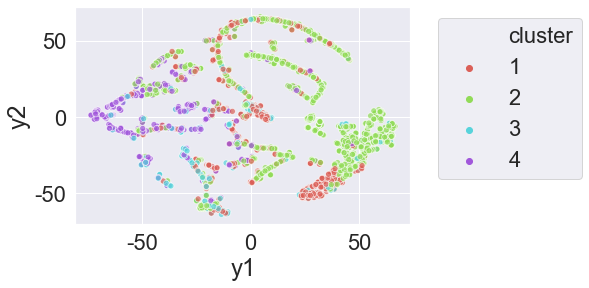

In [142]:
# 이거는 예전에..망한 분석임...ㅎㅎㅎ
sns.scatterplot(x='y1',
               y='y2',
               hue='cluster',
               palette=sns.color_palette('hls',4),
               legend = 'full',
               data=data1,
               alpha=0.7)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

In [118]:
model = KMeans(n_clusters=4, random_state=77, 
               max_iter=50).fit(X_std)
label = model.labels_
pd.value_counts(label)

0    1308
1     905
2     863
3     373
dtype: int64

In [122]:
cus_cluster.groupby('cluster').mean()

나이  대출금액_5개월_1  대출금액_5개월_3  대출금액_5개월_17  대출금액_5개월_21  \
cluster                                                                
1        44.129205    0.613235    0.203089     0.542505     0.081486   
2        40.554696    0.443545    0.060244     0.167816     1.089701   
3        47.564311    0.367638    0.052312     0.150448     0.065587   
4        49.246649    0.795216    0.410590     0.303532     0.189118   

         대출금액_5개월_0  대출금액_5개월_100  대출금액_5개월_220  대출금액_5개월_240     총연체금액  
cluster                                                                  
1          0.169827      0.956008      0.002744      0.067618  0.596330  
2          0.160443      1.108025      0.003015      0.443603  0.501657  
3          1.049414      0.340849      0.002591      0.056762  0.523754  
4          0.175419      0.449766      0.903175      0.076629  0.589812

In [154]:
cus.groupby(['cluster','나이']).size().to_frame().to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/나이.csv',encoding='cp949')

In [127]:
df = cus.groupby(['cluster','성별']).size()
df = df.to_frame()
#비율계산
df = df.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

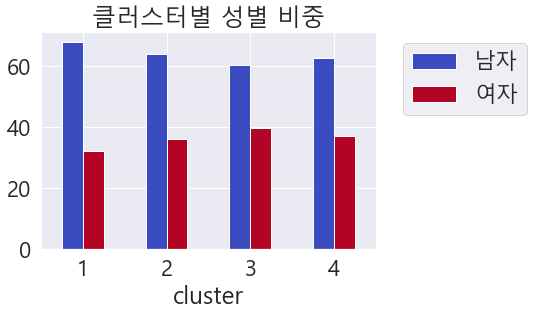

In [128]:
#df = df.unstack().round(2)
ax = df.unstack().plot(kind = 'bar', cmap = 'coolwarm' )

plt.legend(labels=['남자','여자'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('클러스터별 성별 비중')
plt.xticks(rotation=360)

모든 클러스터에서 남성의 비중이 제일 높으며 2클러스터는 남성뿐...

In [129]:
df = cus_info

In [133]:
"""
import numpy as np
df['나이'] = np.where((df.나이 >= 20)&(df.나이 < 40),"YZ세대",
                   np.where((df['나이'] >= 40)&(df['나이'] < 60),"X세대",
                           np.where((df['나이'] >= 60)&(df['나이'] < 70),"베이비부머세대","80대 이상")))
"""

'\nimport numpy as np\ndf[\'나이\'] = np.where((df.나이 >= 20)&(df.나이 < 40),"YZ세대",\n                   np.where((df[\'나이\'] >= 40)&(df[\'나이\'] < 60),"X세대",\n                           np.where((df[\'나이\'] >= 60)&(df[\'나이\'] < 70),"베이비부머세대","80대 이상")))\n'

In [135]:
cus_info['나이'].unique()

array([46, 41, 62, 58, 33, 59, 38, 36, 45, 35, 42, 54, 48, 47, 30, 29, 64,
       44, 67, 37, 65, 24, 31, 39, 57, 49, 50, 32, 34, 40, 43, 52, 51, 26,
       22, 56, 70, 71, 66, 23, 81, 55, 76, 60, 63, 73, 61, 28, 53, 69, 68,
       72, 25, 21, 27, 74, 78, 77, 84, 80, 85, 82, 75, 79], dtype=int64)

In [136]:
import numpy as np
df['나이'] = np.where((df.나이 >= 10)&(df.나이 < 20),"10대",
                   np.where((df['나이'] >= 30)&(df['나이'] < 40),"30대",
                           np.where((df['나이'] >= 40)&(df['나이'] < 50),"40대",
                                   np.where((df['나이'] >= 50)&(df['나이'] < 60),"50대",
                                           np.where((df['나이'] >= 60)&(df['나이'] < 70),"60대",
                                                   np.where((df['나이'] >= 20)&(df['나이'] < 30),"20대",
                                                            np.where((df['나이'] >= 70)&(df['나이'] < 80),"70대",
                                                                     np.where((df['나이'] >= 80)&(df['나이'] < 100),"80대 이상",0))))))))

In [137]:
cus = df

In [138]:
df = cus.groupby(['cluster','나이']).size()
df = df.to_frame()
#비율계산
df = df.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

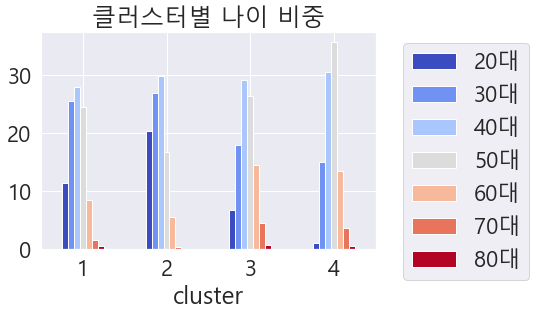

In [139]:
#df = df.unstack().round(2)
ax = df.unstack().plot(kind = 'bar', cmap = 'coolwarm' )

plt.legend(labels=['20대','30대','40대','50대','60대','70대','80대'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('클러스터별 나이 비중')
plt.xticks(rotation=360)

1: 20대 포함, 40대의 비중이 가장높고

2: 50대 없음, 30대의 비중이 가장 많으며, 80대,70대 비중이 가장 높음

3: 50-60대 또이또이

4. 40 - 50대 가장많음

cus.inf0()

cus.head()

In [157]:
cus_cluster.groupby('cluster').mean()

나이  대출금액_5개월_1  대출금액_5개월_3  대출금액_5개월_17  대출금액_5개월_21  \
cluster                                                                
1        44.129205    0.613235    0.203089     0.542505     0.081486   
2        40.554696    0.443545    0.060244     0.167816     1.089701   
3        47.564311    0.367638    0.052312     0.150448     0.065587   
4        49.246649    0.795216    0.410590     0.303532     0.189118   

         대출금액_5개월_0  대출금액_5개월_100  대출금액_5개월_220  대출금액_5개월_240     총연체금액  
cluster                                                                  
1          0.169827      0.956008      0.002744      0.067618  0.596330  
2          0.160443      1.108025      0.003015      0.443603  0.501657  
3          1.049414      0.340849      0.002591      0.056762  0.523754  
4          0.175419      0.449766      0.903175      0.076629  0.589812

In [158]:
cus.columns

Index(['나이', '대출건수_5개월_1', '대출건수_5개월_3', '대출건수_5개월_5', '대출건수_5개월_6',
       '대출건수_5개월_8', '대출건수_5개월_17', '대출건수_5개월_21', '대출건수_5개월_98', '대출금액_5개월_1',
       ...
       '연체금액_5개월_801', '연체금액_5개월_1101', '연체금액_5개월_1201', '연체금액_5개월_1301',
       '연체금액_5개월_9997', '연체금액_5개월_9998', '총연체금액', '총연체건수', '성별', 'cluster'],
      dtype='object', length=106)

In [159]:
cus.columns[2]

'대출건수_5개월_3'

In [162]:
#이상치 제거
cus = cap_data(cus)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7:

# 연체자 정보를 결합해서 건수 별로 뽑은거

<Figure size 432x288 with 0 Axes>

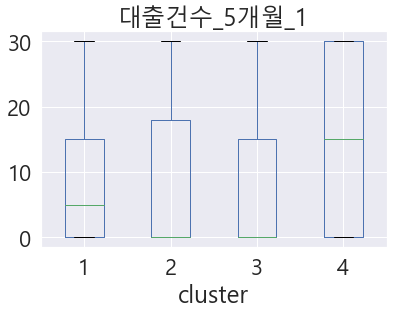

<Figure size 432x288 with 0 Axes>

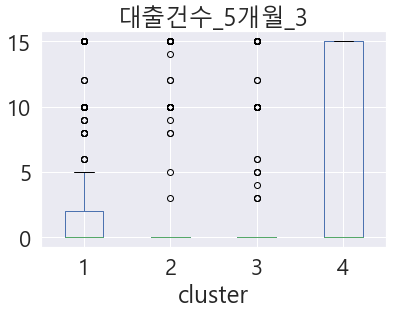

<Figure size 432x288 with 0 Axes>

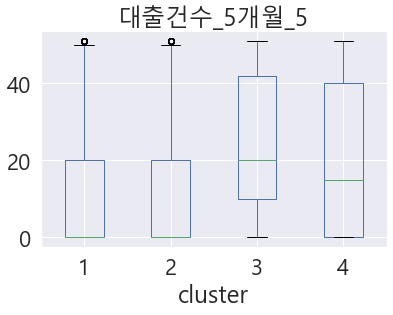

<Figure size 432x288 with 0 Axes>

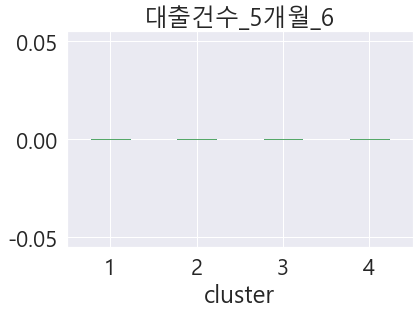

<Figure size 432x288 with 0 Axes>

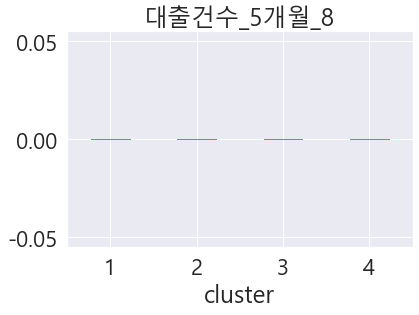

<Figure size 432x288 with 0 Axes>

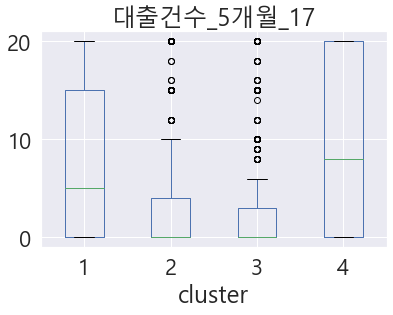

<Figure size 432x288 with 0 Axes>

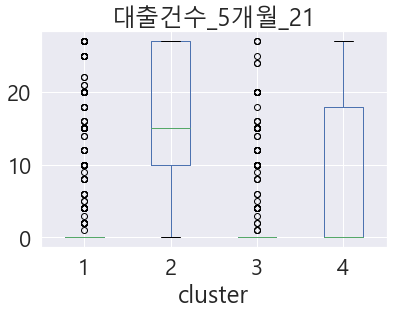

<Figure size 432x288 with 0 Axes>

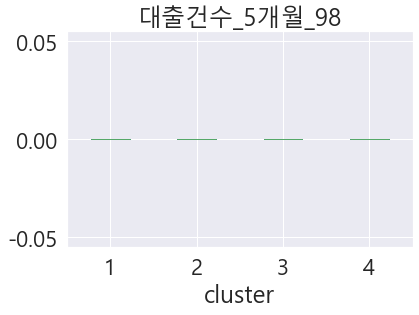

<Figure size 432x288 with 0 Axes>

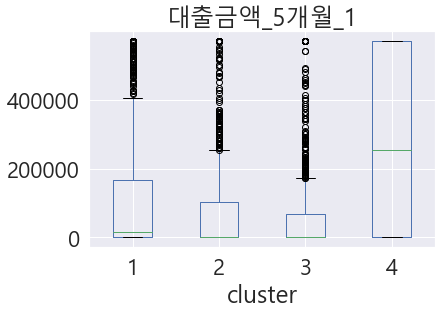

<Figure size 432x288 with 0 Axes>

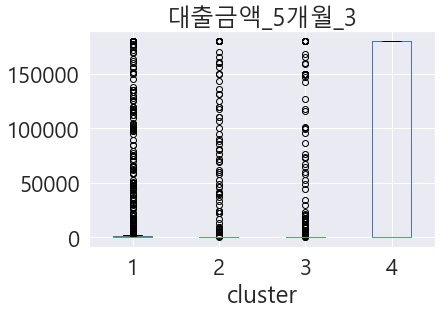

<Figure size 432x288 with 0 Axes>

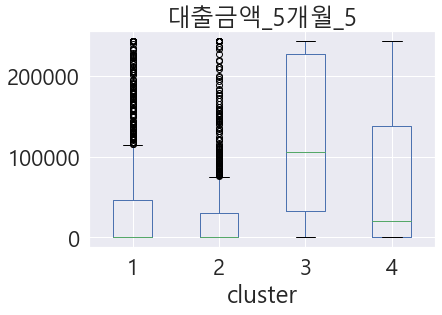

<Figure size 432x288 with 0 Axes>

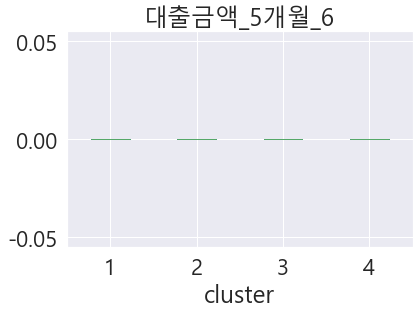

<Figure size 432x288 with 0 Axes>

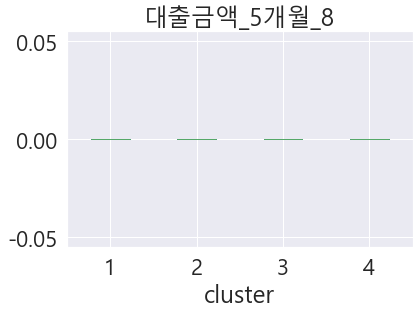

<Figure size 432x288 with 0 Axes>

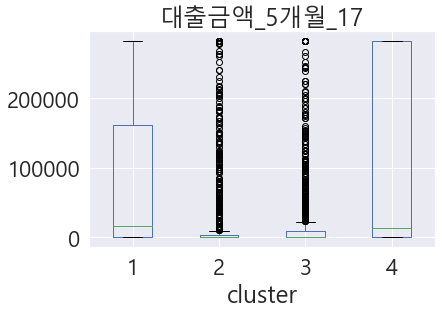

<Figure size 432x288 with 0 Axes>

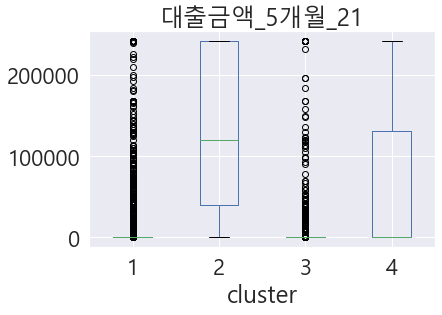

<Figure size 432x288 with 0 Axes>

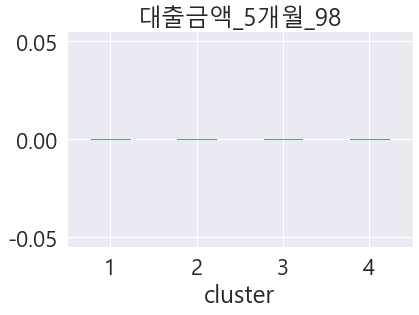

<Figure size 432x288 with 0 Axes>

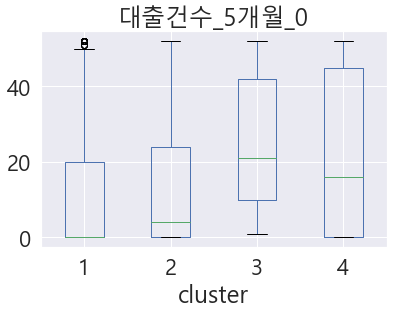

<Figure size 432x288 with 0 Axes>

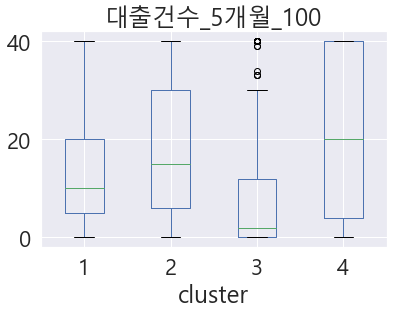

<Figure size 432x288 with 0 Axes>

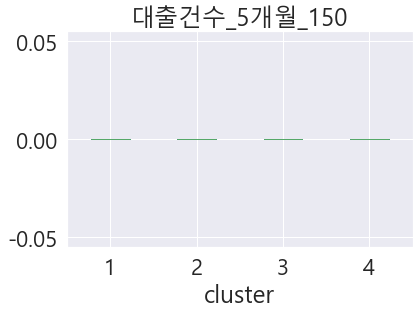

<Figure size 432x288 with 0 Axes>

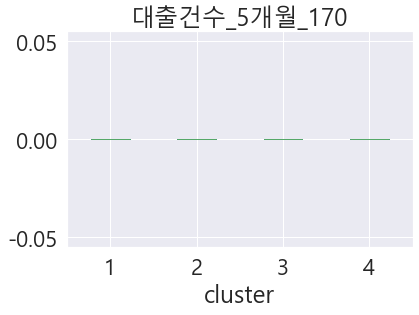

<Figure size 432x288 with 0 Axes>

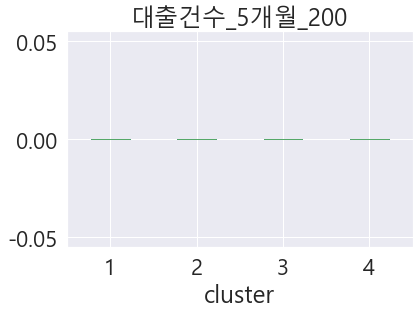

<Figure size 432x288 with 0 Axes>

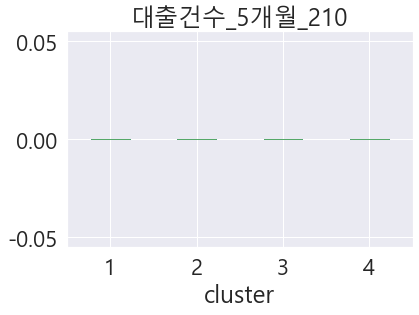

<Figure size 432x288 with 0 Axes>

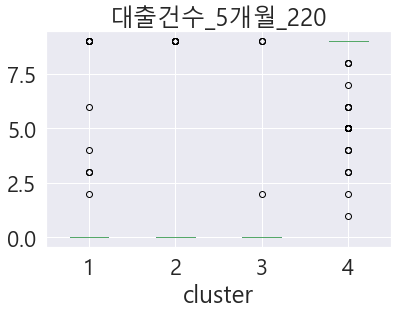

<Figure size 432x288 with 0 Axes>

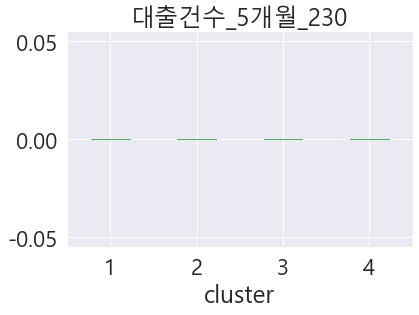

<Figure size 432x288 with 0 Axes>

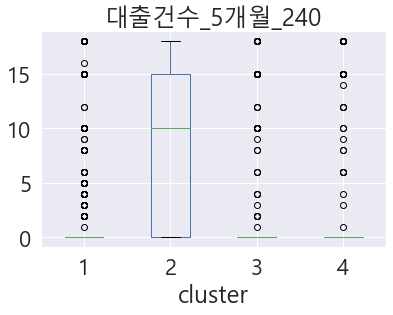

<Figure size 432x288 with 0 Axes>

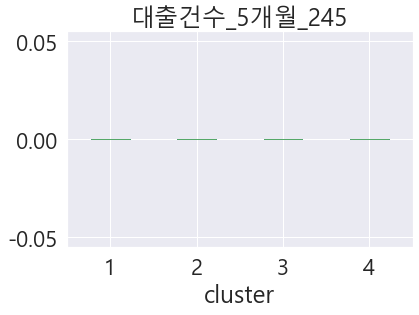

<Figure size 432x288 with 0 Axes>

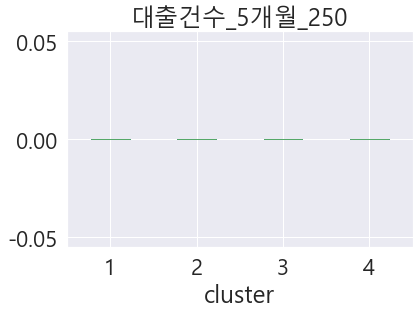

<Figure size 432x288 with 0 Axes>

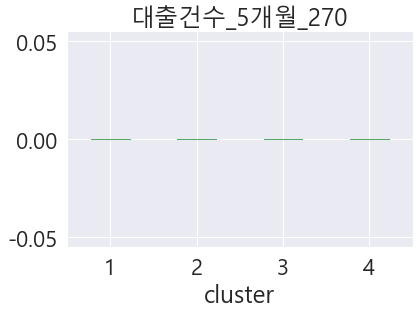

<Figure size 432x288 with 0 Axes>

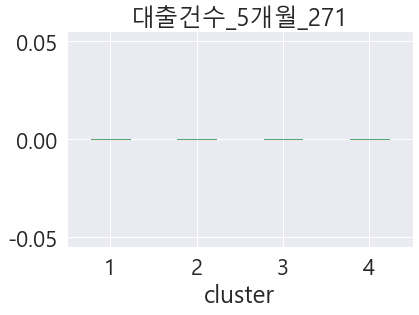

<Figure size 432x288 with 0 Axes>

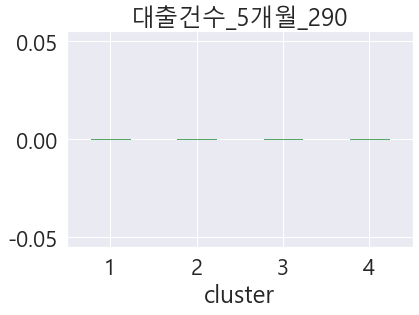

<Figure size 432x288 with 0 Axes>

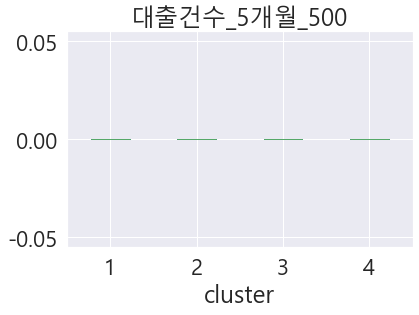

<Figure size 432x288 with 0 Axes>

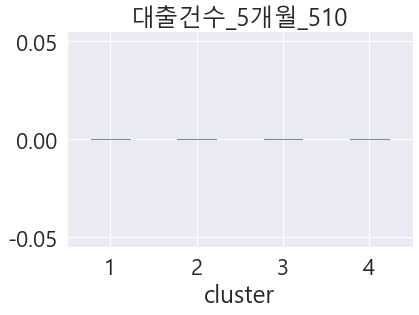

<Figure size 432x288 with 0 Axes>

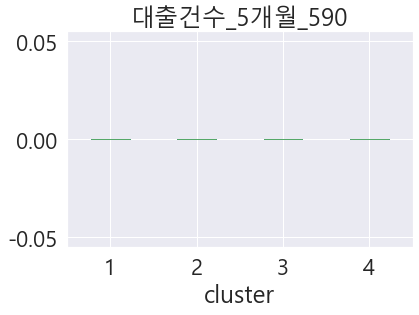

<Figure size 432x288 with 0 Axes>

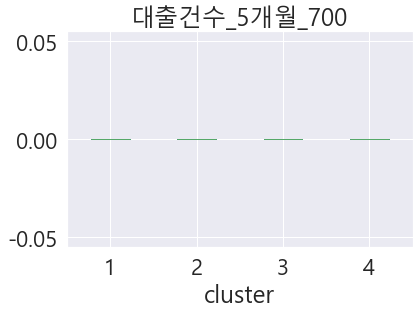

<Figure size 432x288 with 0 Axes>

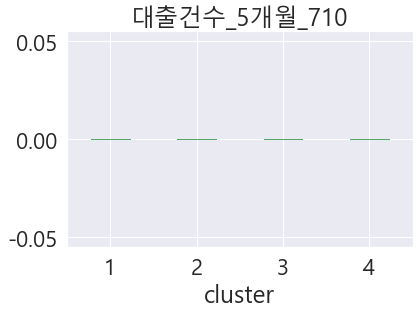

<Figure size 432x288 with 0 Axes>

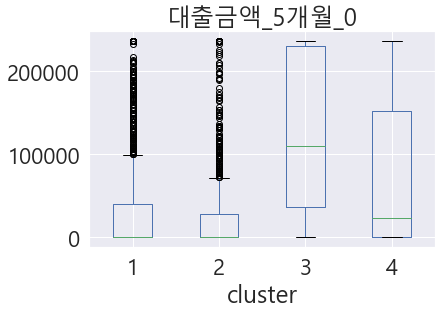

<Figure size 432x288 with 0 Axes>

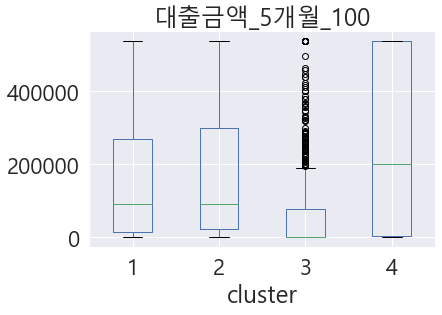

<Figure size 432x288 with 0 Axes>

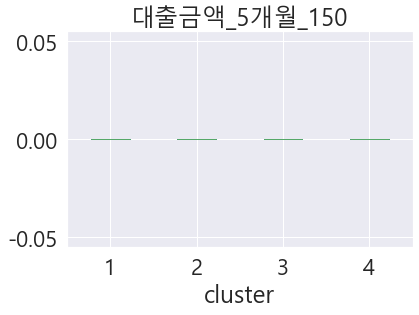

<Figure size 432x288 with 0 Axes>

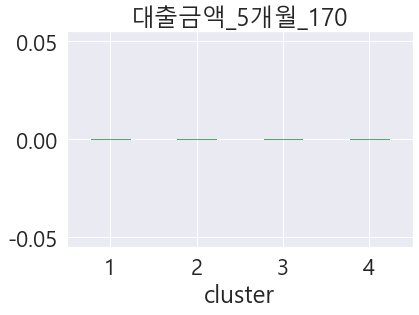

<Figure size 432x288 with 0 Axes>

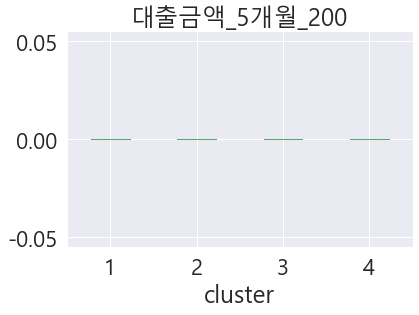

<Figure size 432x288 with 0 Axes>

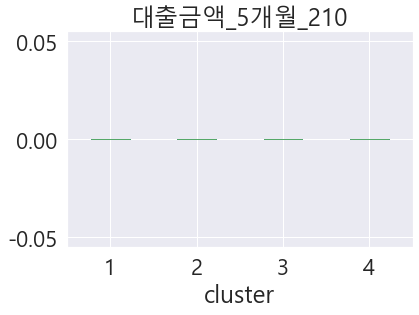

<Figure size 432x288 with 0 Axes>

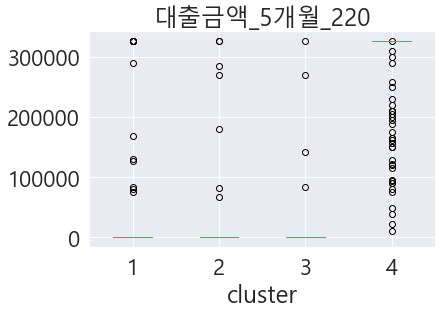

<Figure size 432x288 with 0 Axes>

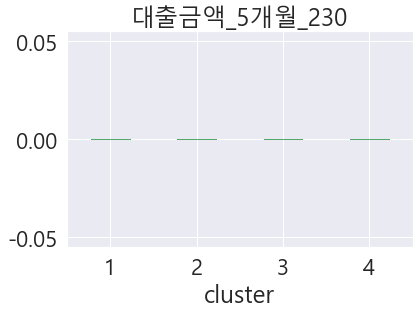

<Figure size 432x288 with 0 Axes>

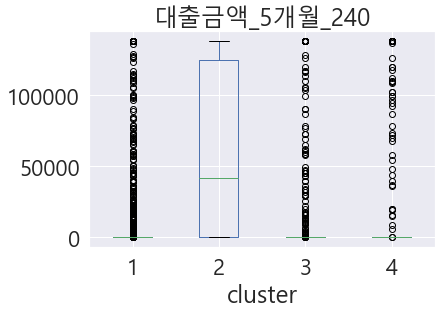

<Figure size 432x288 with 0 Axes>

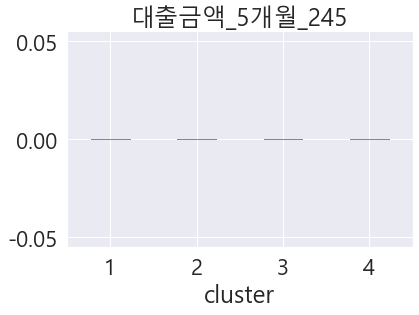

<Figure size 432x288 with 0 Axes>

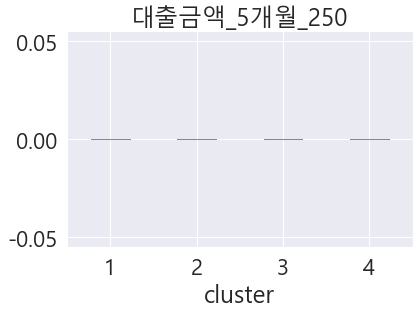

<Figure size 432x288 with 0 Axes>

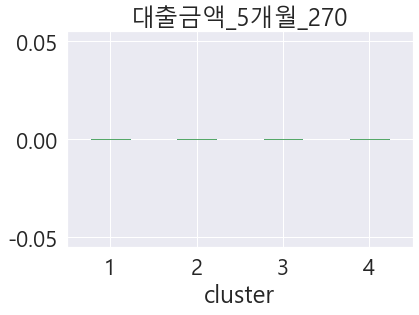

<Figure size 432x288 with 0 Axes>

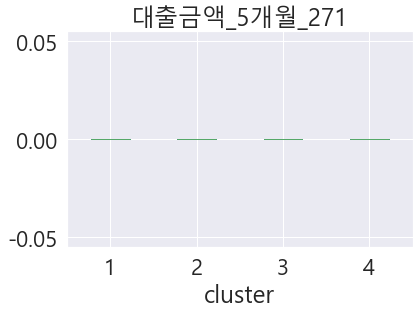

<Figure size 432x288 with 0 Axes>

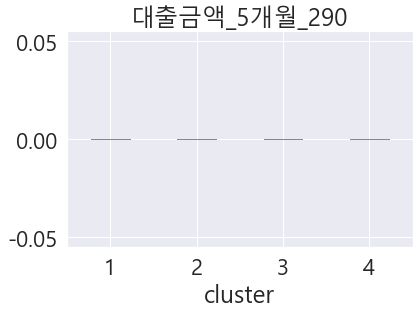

<Figure size 432x288 with 0 Axes>

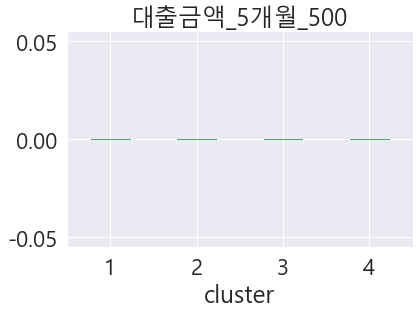

<Figure size 432x288 with 0 Axes>

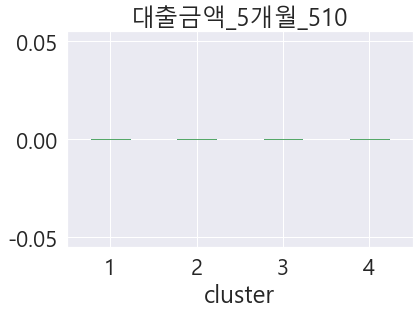

<Figure size 432x288 with 0 Axes>

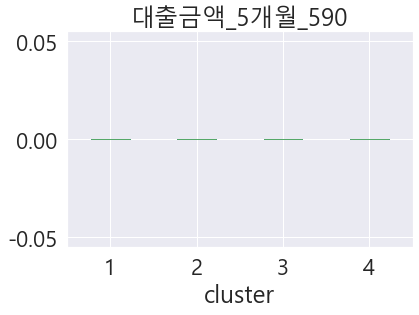

<Figure size 432x288 with 0 Axes>

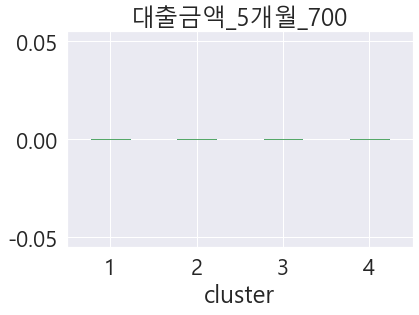

<Figure size 432x288 with 0 Axes>

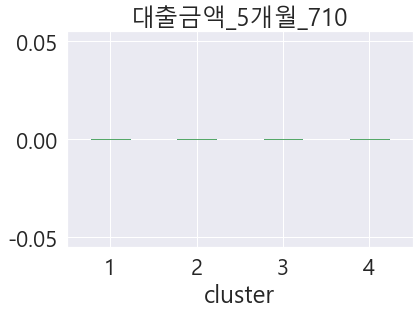

<Figure size 432x288 with 0 Axes>

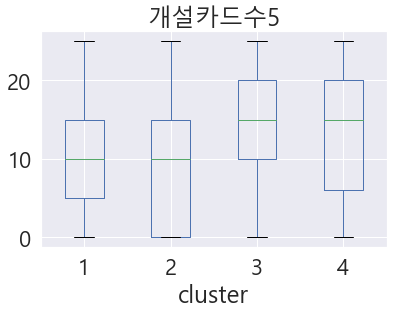

<Figure size 432x288 with 0 Axes>

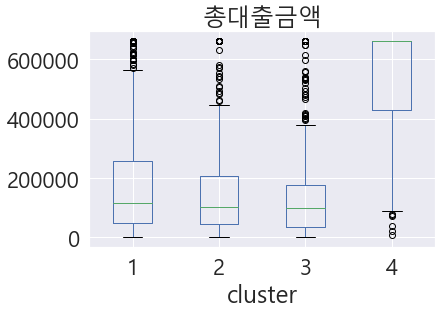

<Figure size 432x288 with 0 Axes>

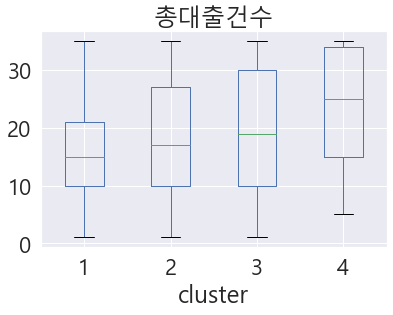

<Figure size 432x288 with 0 Axes>

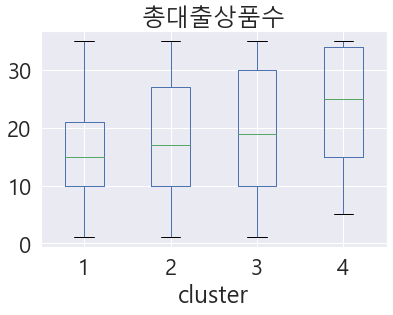

<Figure size 432x288 with 0 Axes>

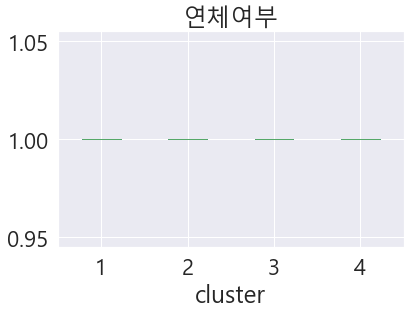

<Figure size 432x288 with 0 Axes>

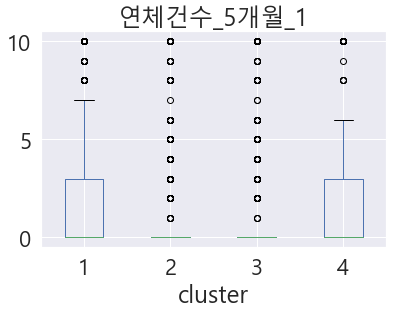

<Figure size 432x288 with 0 Axes>

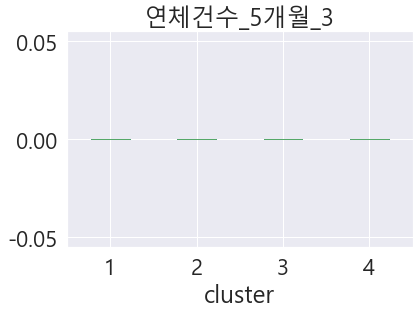

<Figure size 432x288 with 0 Axes>

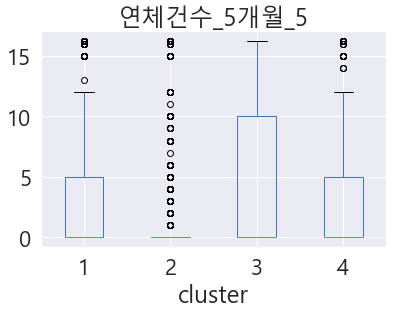

<Figure size 432x288 with 0 Axes>

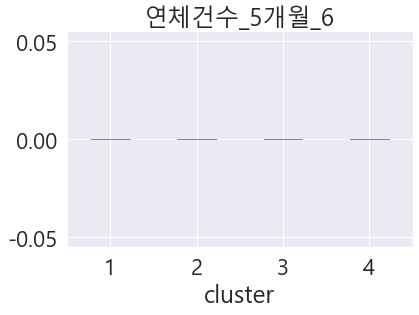

<Figure size 432x288 with 0 Axes>

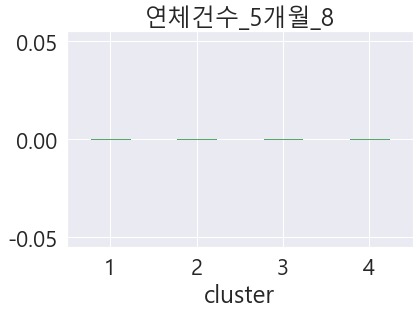

<Figure size 432x288 with 0 Axes>

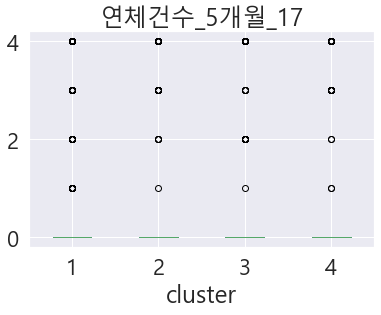

<Figure size 432x288 with 0 Axes>

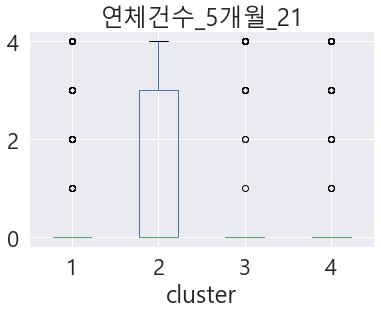

<Figure size 432x288 with 0 Axes>

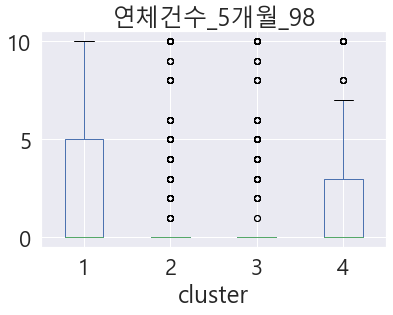

<Figure size 432x288 with 0 Axes>

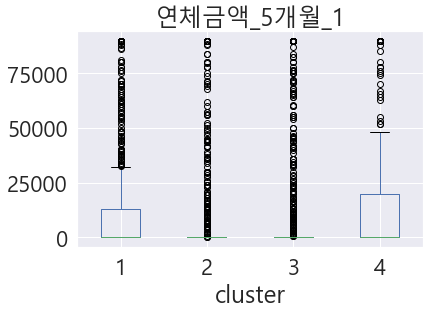

<Figure size 432x288 with 0 Axes>

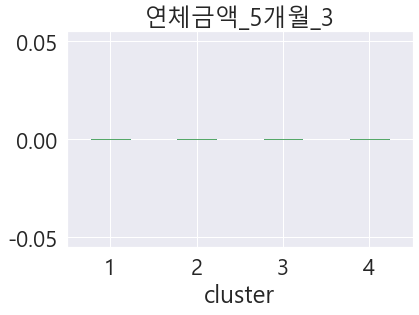

<Figure size 432x288 with 0 Axes>

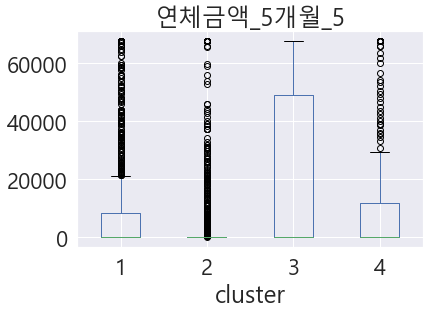

<Figure size 432x288 with 0 Axes>

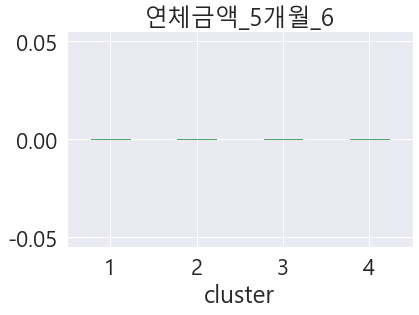

<Figure size 432x288 with 0 Axes>

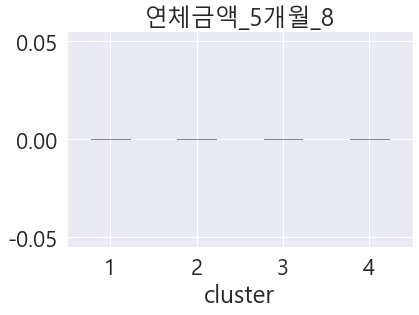

<Figure size 432x288 with 0 Axes>

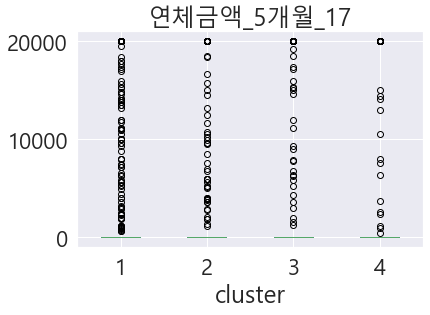

<Figure size 432x288 with 0 Axes>

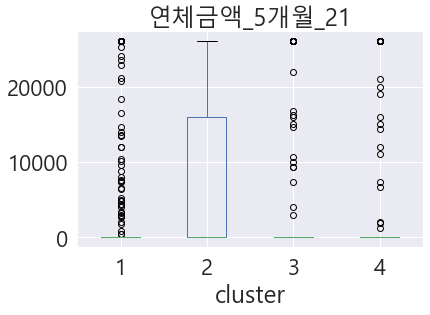

<Figure size 432x288 with 0 Axes>

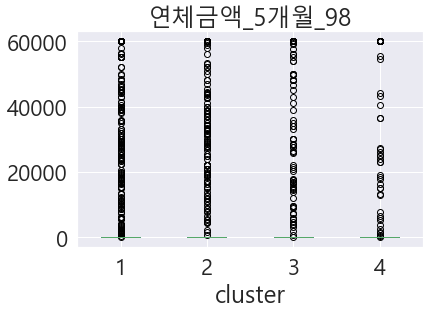

<Figure size 432x288 with 0 Axes>

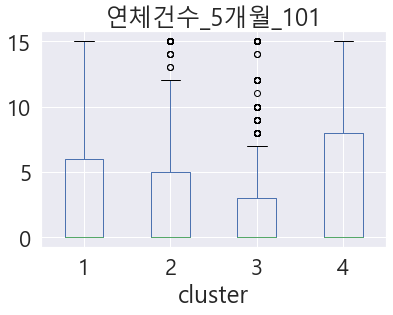

<Figure size 432x288 with 0 Axes>

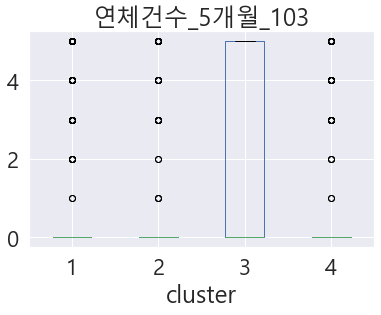

<Figure size 432x288 with 0 Axes>

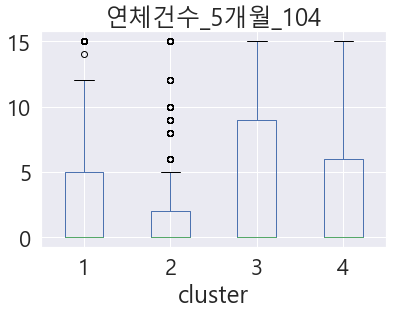

<Figure size 432x288 with 0 Axes>

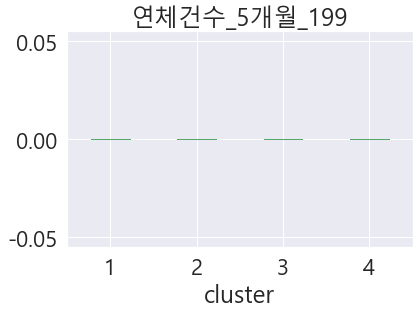

<Figure size 432x288 with 0 Axes>

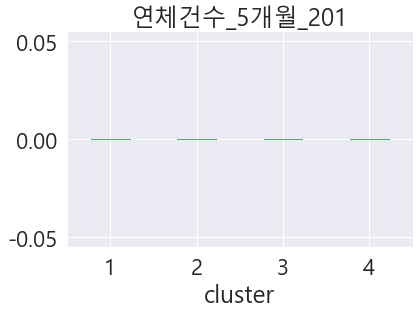

<Figure size 432x288 with 0 Axes>

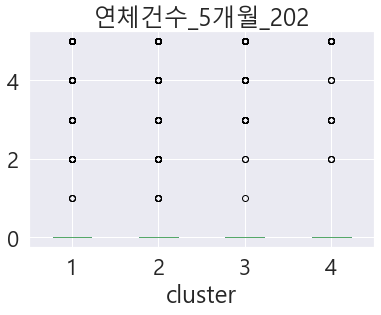

<Figure size 432x288 with 0 Axes>

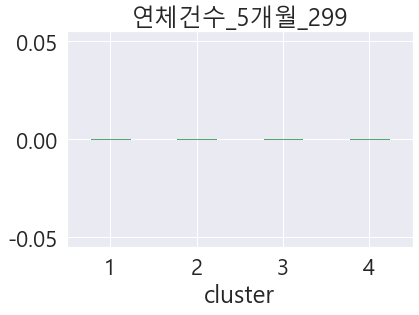

<Figure size 432x288 with 0 Axes>

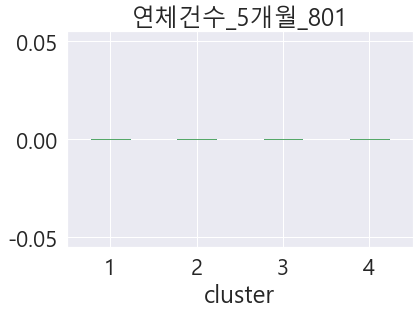

<Figure size 432x288 with 0 Axes>

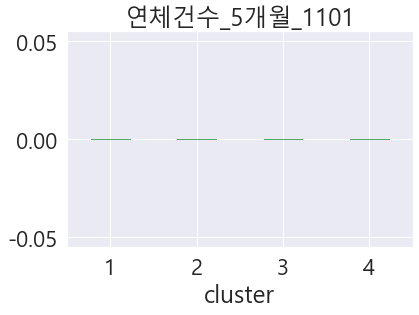

<Figure size 432x288 with 0 Axes>

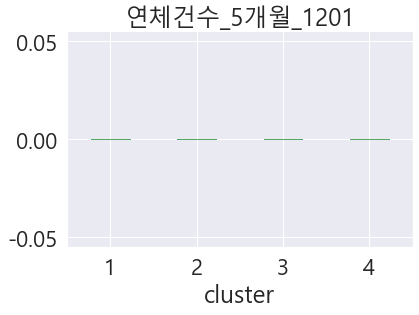

<Figure size 432x288 with 0 Axes>

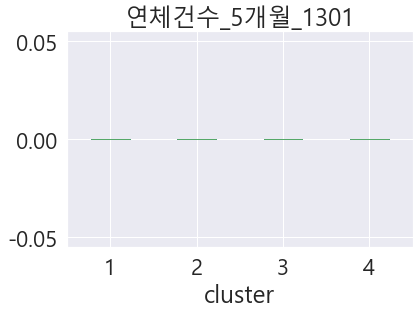

<Figure size 432x288 with 0 Axes>

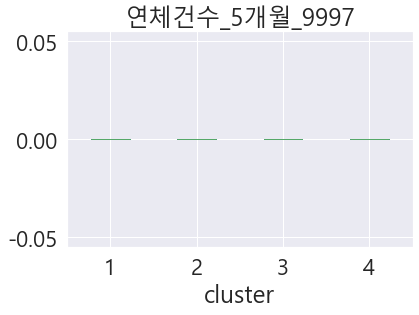

<Figure size 432x288 with 0 Axes>

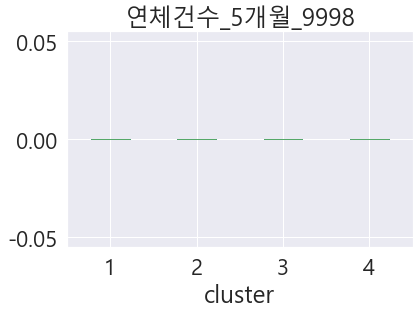

<Figure size 432x288 with 0 Axes>

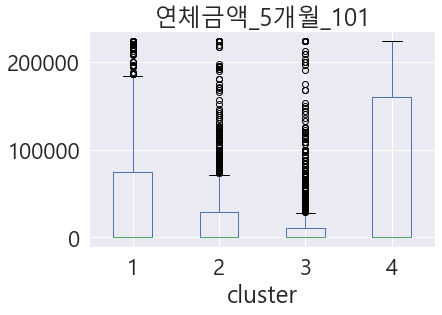

<Figure size 432x288 with 0 Axes>

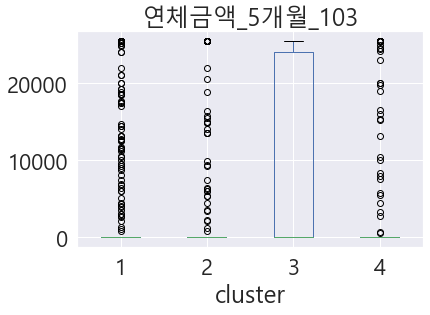

<Figure size 432x288 with 0 Axes>

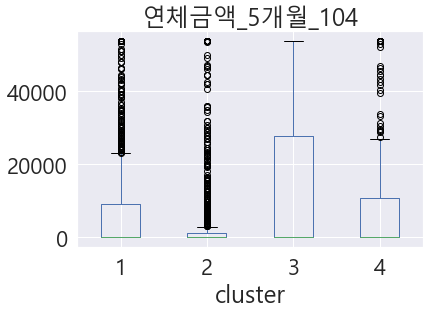

<Figure size 432x288 with 0 Axes>

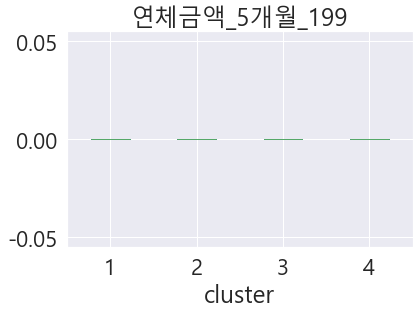

<Figure size 432x288 with 0 Axes>

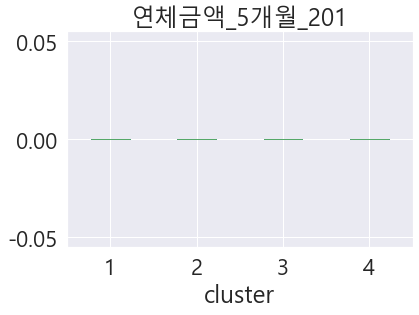

<Figure size 432x288 with 0 Axes>

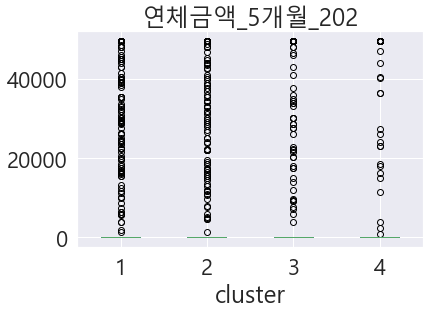

<Figure size 432x288 with 0 Axes>

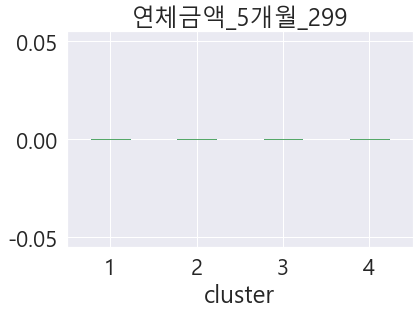

<Figure size 432x288 with 0 Axes>

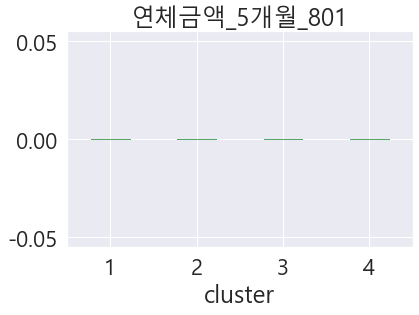

<Figure size 432x288 with 0 Axes>

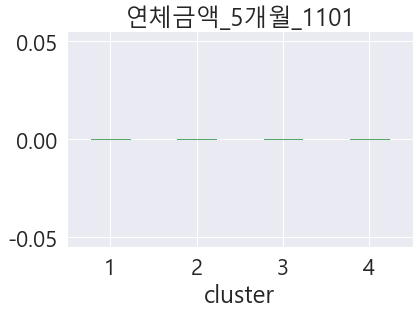

<Figure size 432x288 with 0 Axes>

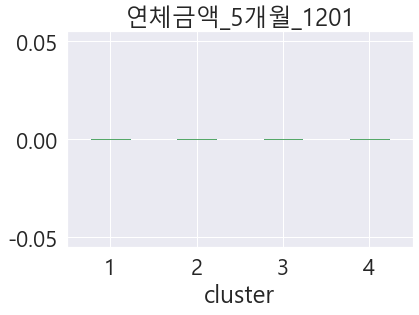

<Figure size 432x288 with 0 Axes>

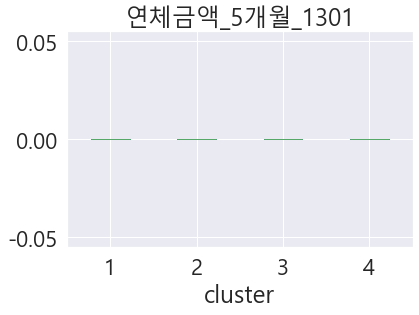

<Figure size 432x288 with 0 Axes>

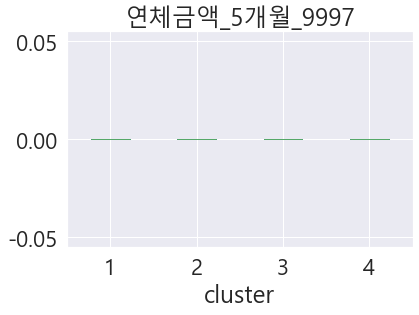

<Figure size 432x288 with 0 Axes>

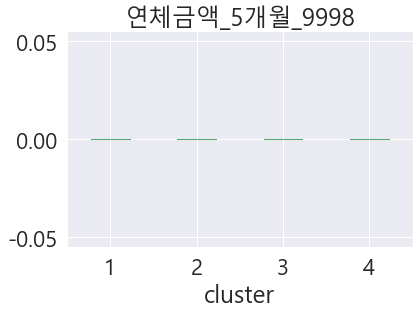

<Figure size 432x288 with 0 Axes>

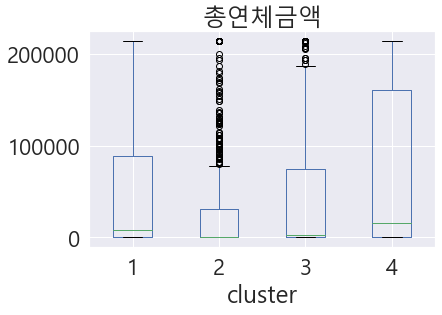

<Figure size 432x288 with 0 Axes>

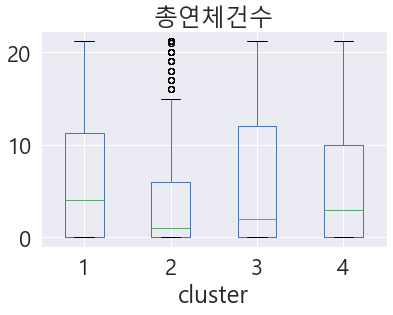

<Figure size 432x288 with 0 Axes>

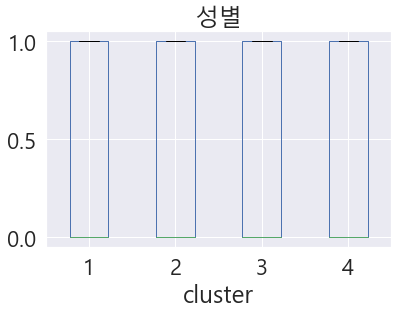

<Figure size 432x288 with 0 Axes>

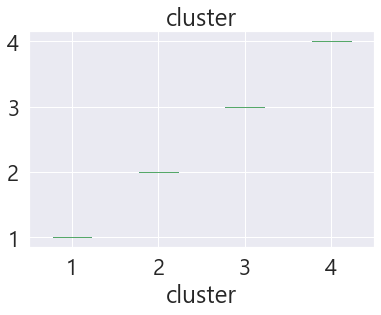

In [163]:
for i in range(1,len(cus.columns)):
    try:
        plt.figure()
        ax = cus.boxplot(column= cus.columns[i], by='cluster')
        plt.suptitle('')
        plt.show()
    except:
        print('')

# 총대출건수 대비 OO대출건수, 총대출금액대비 OO 대출금액, 총연채건수 대비 OO 연체건수 , 총연체금액 대비 OO 연체금액 Cus_info2로 데분

## div!!!

In [532]:
cus = cus_info2

<Figure size 432x288 with 0 Axes>

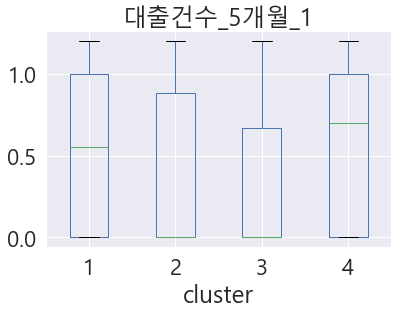

<Figure size 432x288 with 0 Axes>

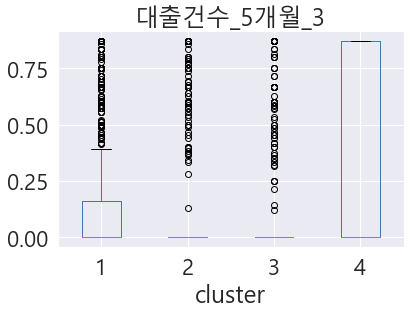

<Figure size 432x288 with 0 Axes>

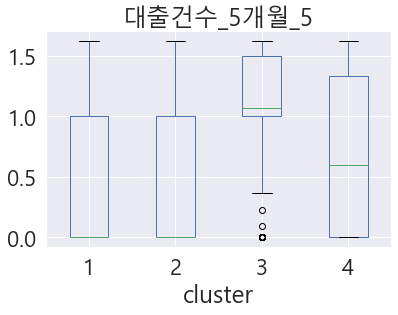

<Figure size 432x288 with 0 Axes>

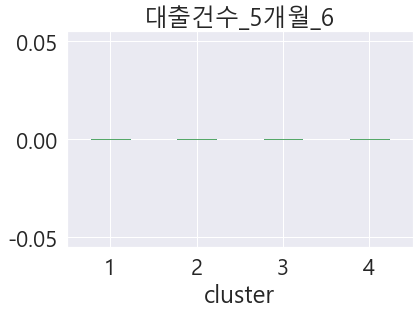

<Figure size 432x288 with 0 Axes>

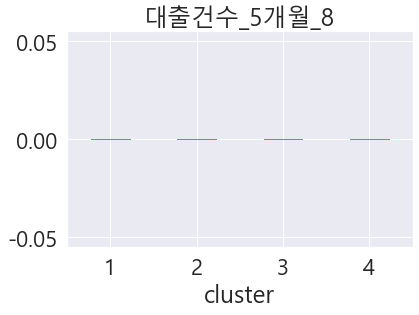

<Figure size 432x288 with 0 Axes>

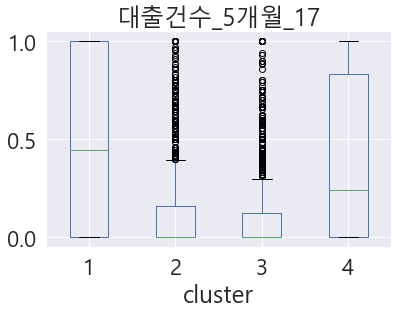

<Figure size 432x288 with 0 Axes>

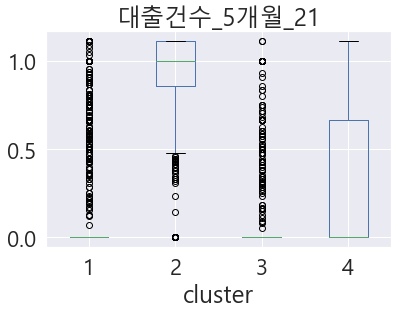

<Figure size 432x288 with 0 Axes>

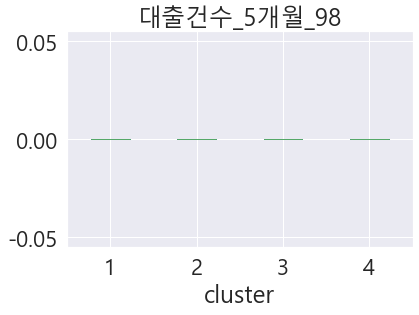

<Figure size 432x288 with 0 Axes>

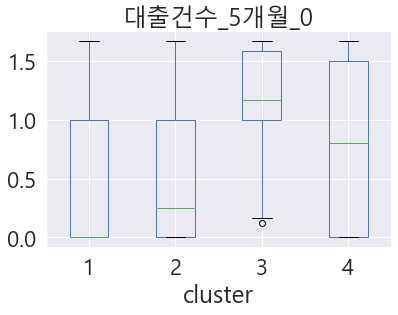

<Figure size 432x288 with 0 Axes>

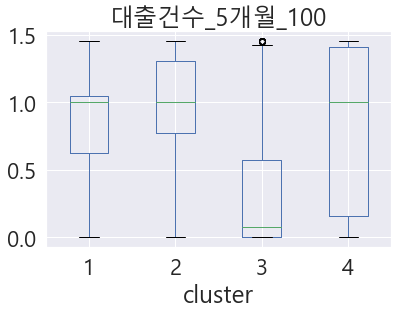

<Figure size 432x288 with 0 Axes>

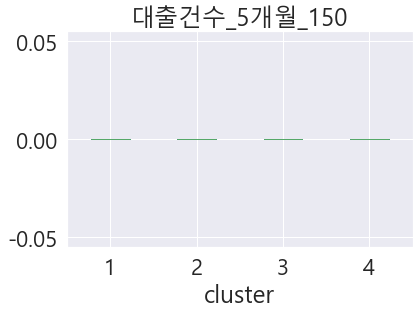

<Figure size 432x288 with 0 Axes>

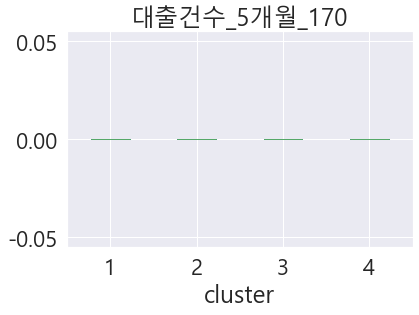

<Figure size 432x288 with 0 Axes>

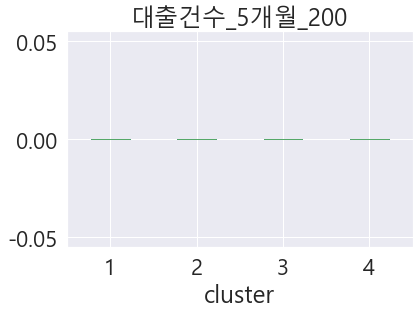

<Figure size 432x288 with 0 Axes>

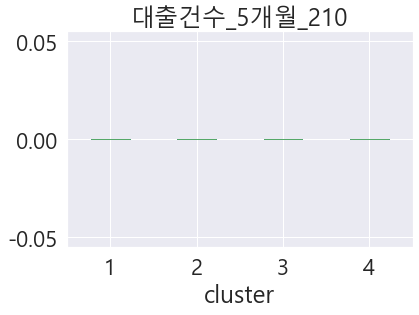

<Figure size 432x288 with 0 Axes>

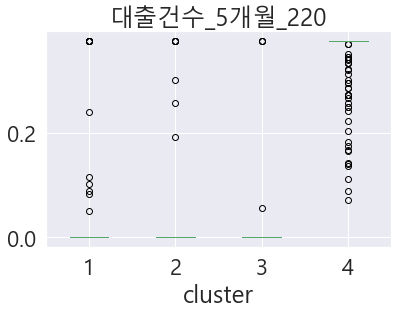

<Figure size 432x288 with 0 Axes>

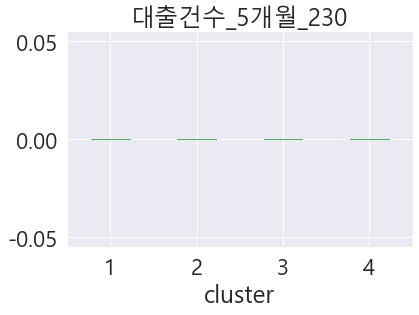

<Figure size 432x288 with 0 Axes>

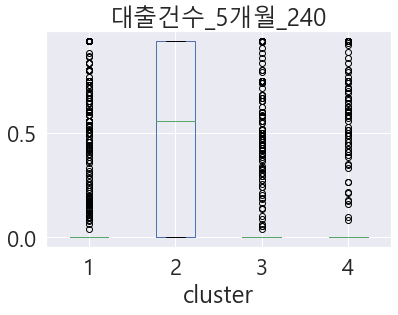

<Figure size 432x288 with 0 Axes>

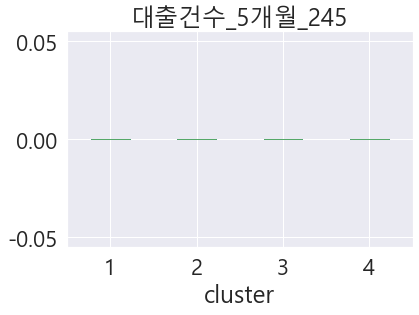

<Figure size 432x288 with 0 Axes>

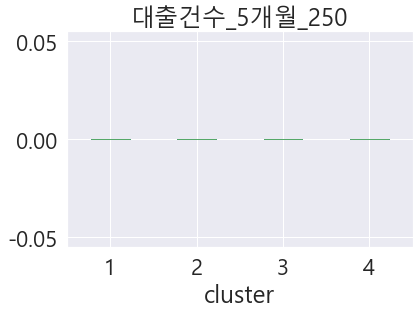

<Figure size 432x288 with 0 Axes>

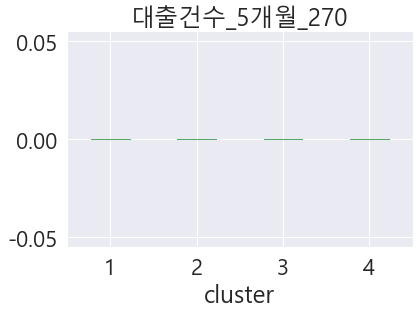

<Figure size 432x288 with 0 Axes>

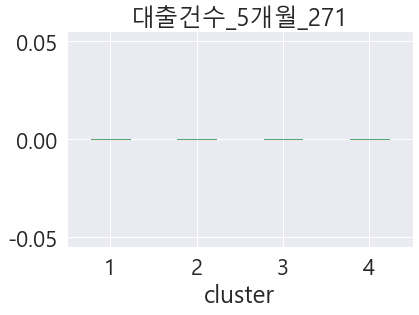

<Figure size 432x288 with 0 Axes>

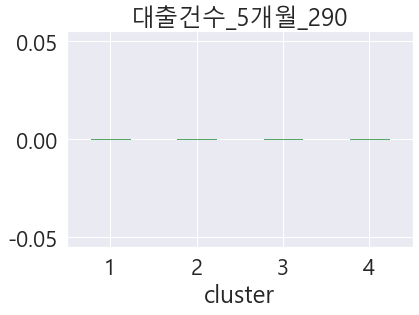

<Figure size 432x288 with 0 Axes>

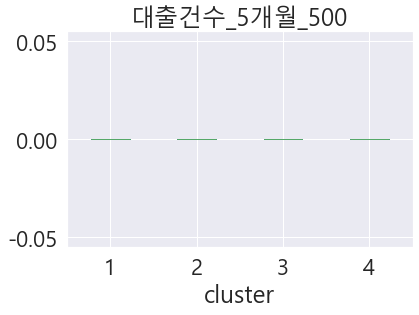

<Figure size 432x288 with 0 Axes>

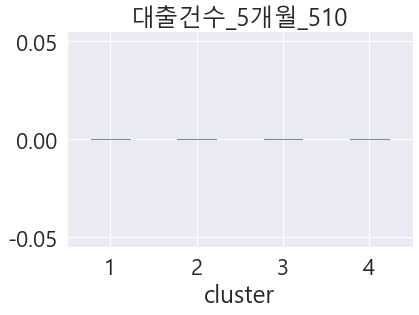

<Figure size 432x288 with 0 Axes>

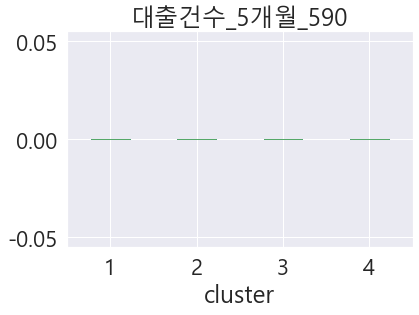

<Figure size 432x288 with 0 Axes>

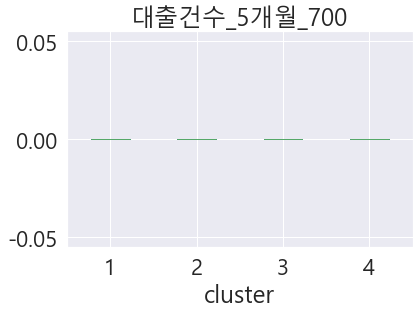

<Figure size 432x288 with 0 Axes>

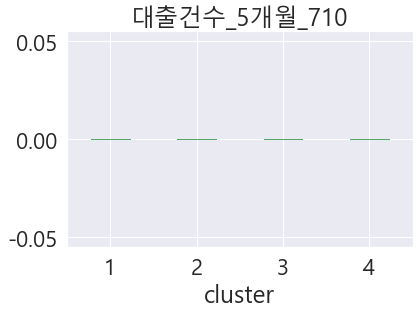

<Figure size 432x288 with 0 Axes>

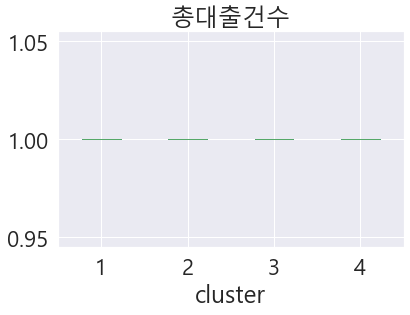

<Figure size 432x288 with 0 Axes>

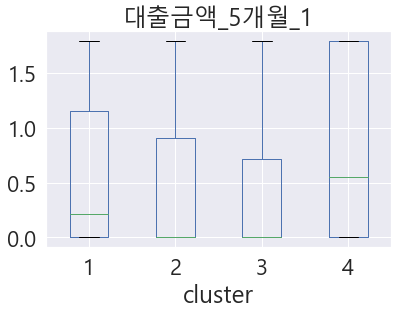

<Figure size 432x288 with 0 Axes>

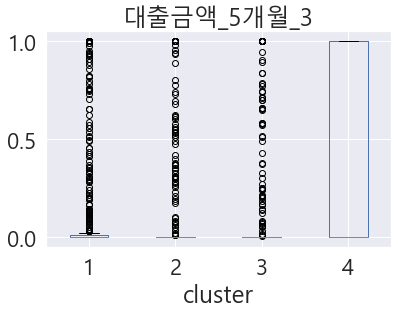

<Figure size 432x288 with 0 Axes>

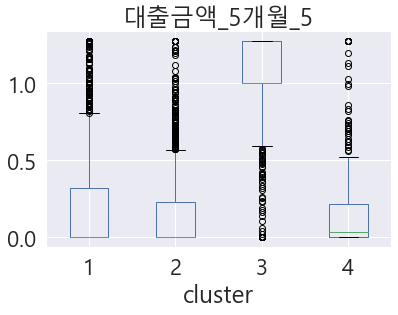

<Figure size 432x288 with 0 Axes>

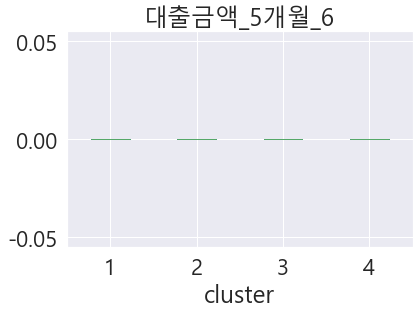

<Figure size 432x288 with 0 Axes>

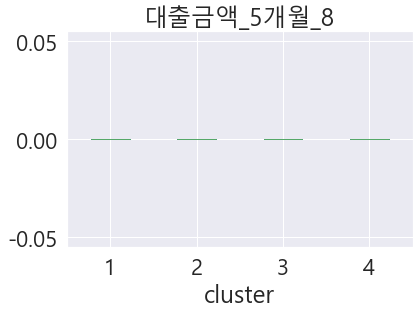

<Figure size 432x288 with 0 Axes>

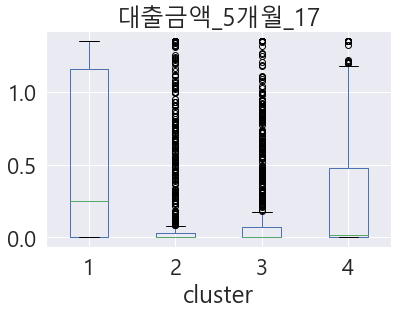

<Figure size 432x288 with 0 Axes>

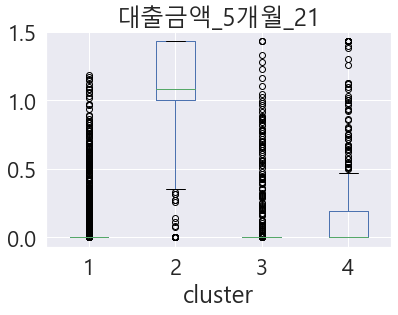

<Figure size 432x288 with 0 Axes>

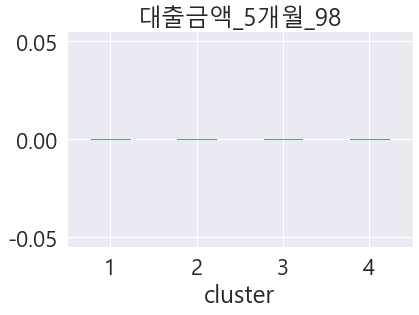

<Figure size 432x288 with 0 Axes>

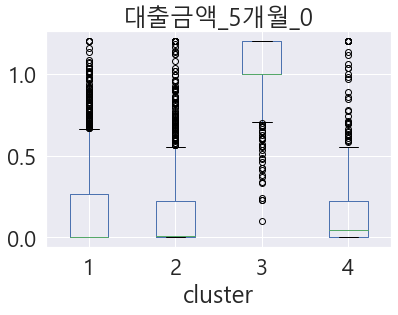

<Figure size 432x288 with 0 Axes>

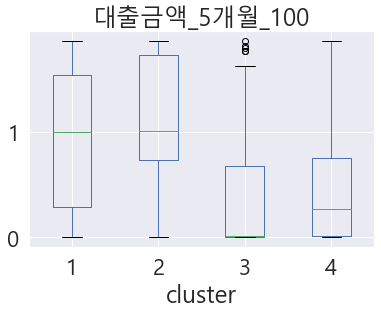

<Figure size 432x288 with 0 Axes>

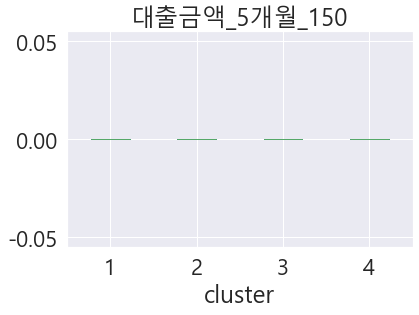

<Figure size 432x288 with 0 Axes>

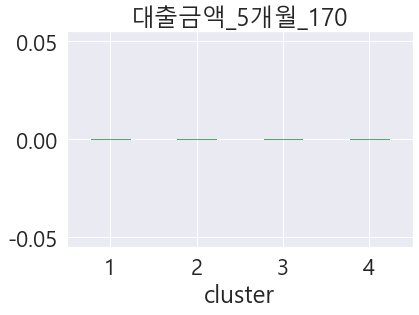

<Figure size 432x288 with 0 Axes>

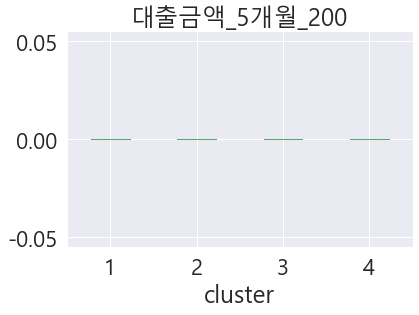

<Figure size 432x288 with 0 Axes>

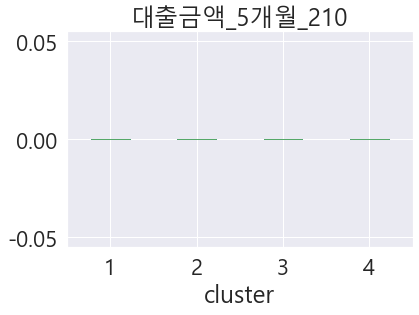

<Figure size 432x288 with 0 Axes>

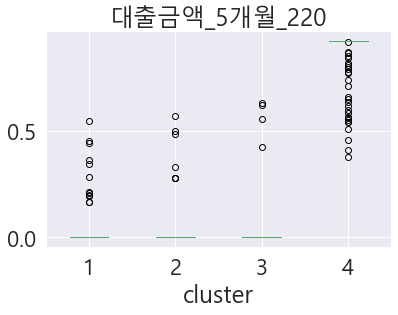

<Figure size 432x288 with 0 Axes>

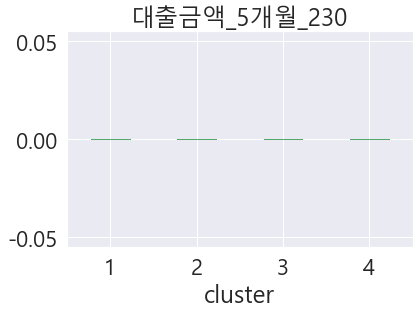

<Figure size 432x288 with 0 Axes>

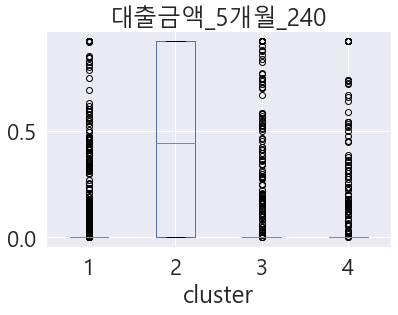

<Figure size 432x288 with 0 Axes>

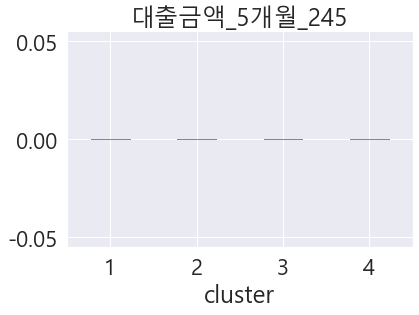

<Figure size 432x288 with 0 Axes>

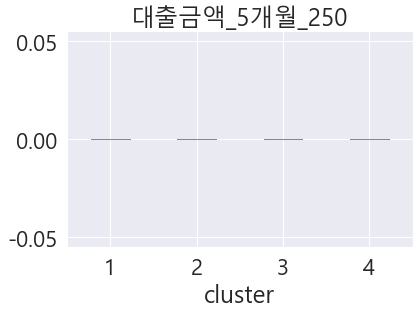

<Figure size 432x288 with 0 Axes>

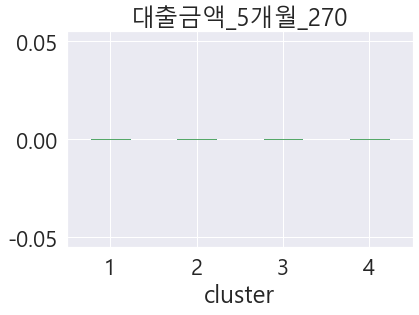

<Figure size 432x288 with 0 Axes>

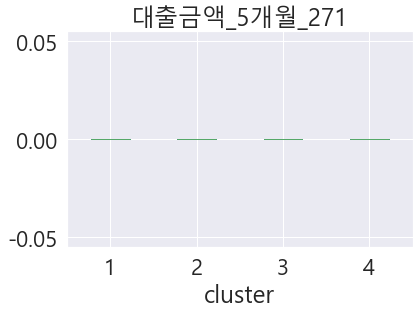

<Figure size 432x288 with 0 Axes>

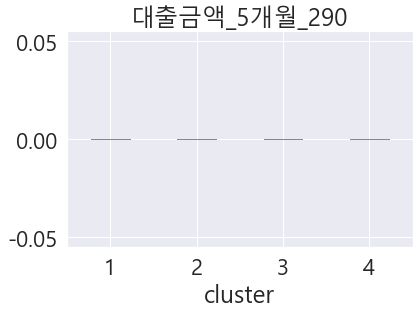

<Figure size 432x288 with 0 Axes>

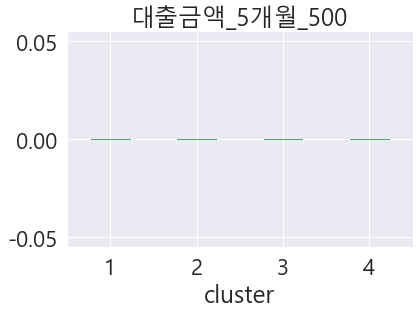

<Figure size 432x288 with 0 Axes>

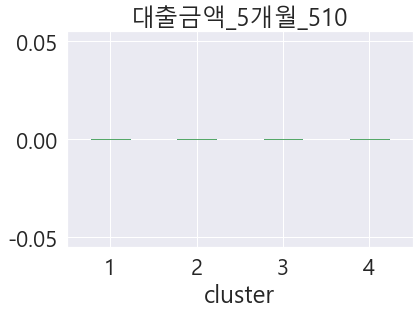

<Figure size 432x288 with 0 Axes>

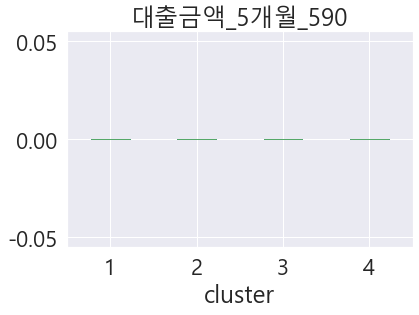

<Figure size 432x288 with 0 Axes>

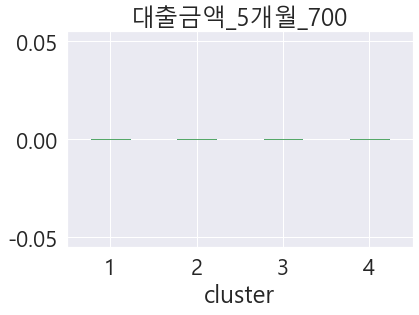

<Figure size 432x288 with 0 Axes>

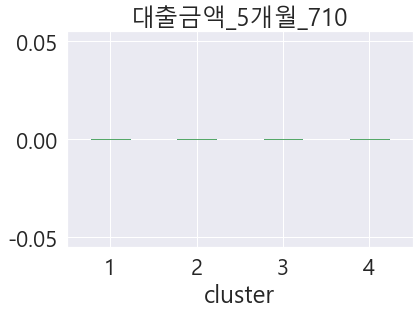

<Figure size 432x288 with 0 Axes>

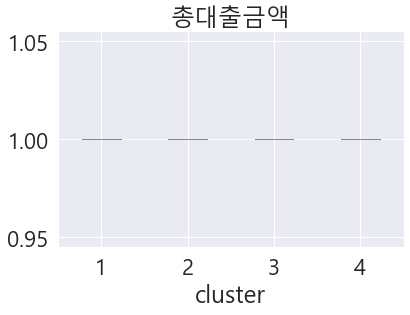

<Figure size 432x288 with 0 Axes>

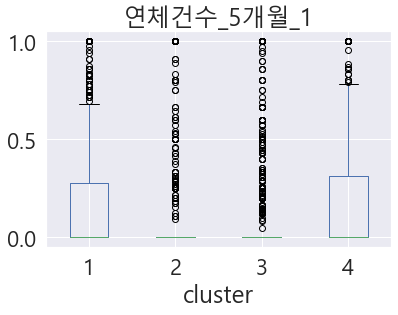

<Figure size 432x288 with 0 Axes>

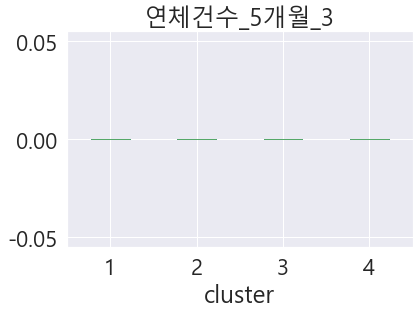

<Figure size 432x288 with 0 Axes>

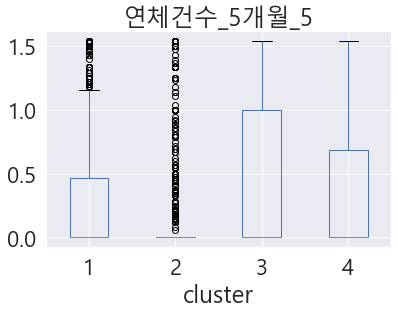

<Figure size 432x288 with 0 Axes>

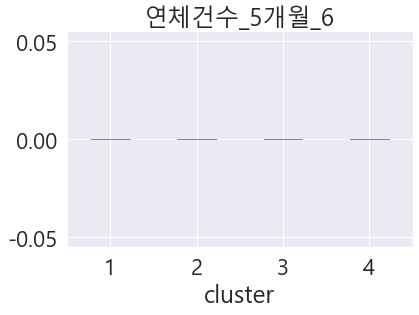

<Figure size 432x288 with 0 Axes>

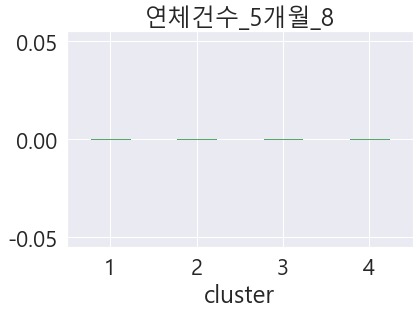

<Figure size 432x288 with 0 Axes>

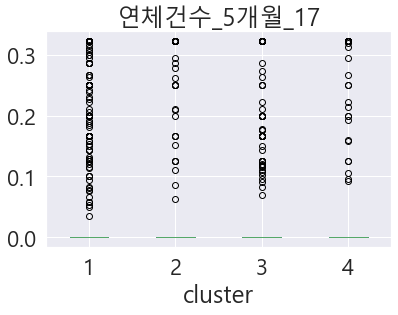

<Figure size 432x288 with 0 Axes>

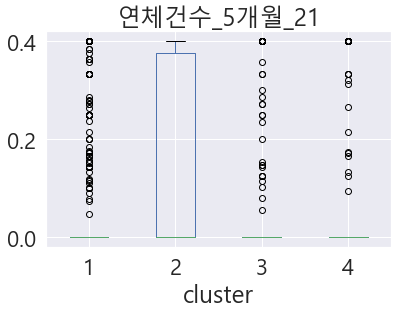

<Figure size 432x288 with 0 Axes>

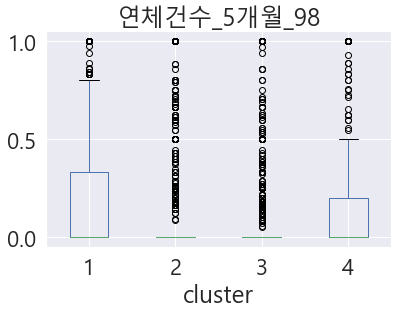

<Figure size 432x288 with 0 Axes>

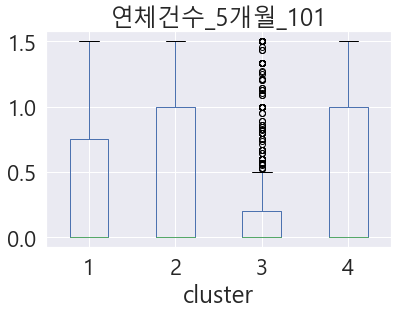

<Figure size 432x288 with 0 Axes>

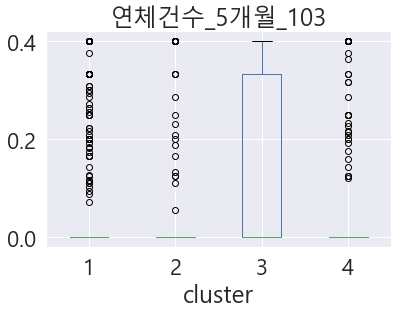

<Figure size 432x288 with 0 Axes>

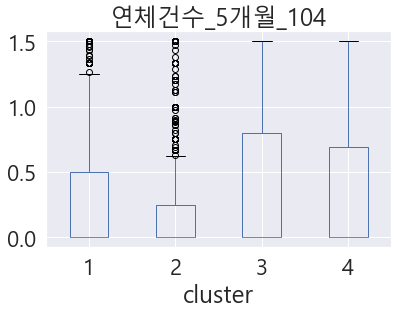

<Figure size 432x288 with 0 Axes>

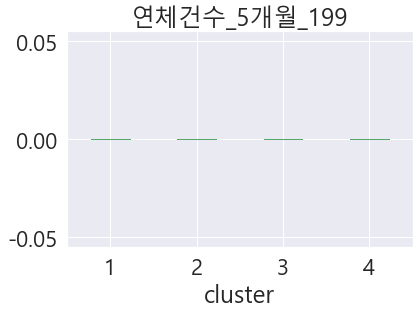

<Figure size 432x288 with 0 Axes>

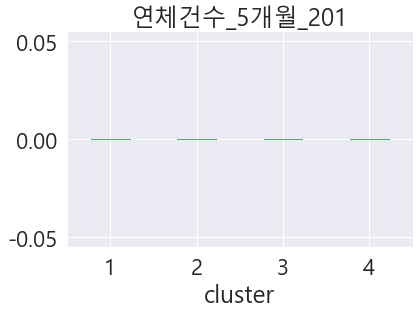

<Figure size 432x288 with 0 Axes>

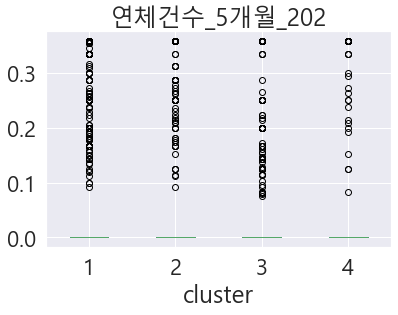

<Figure size 432x288 with 0 Axes>

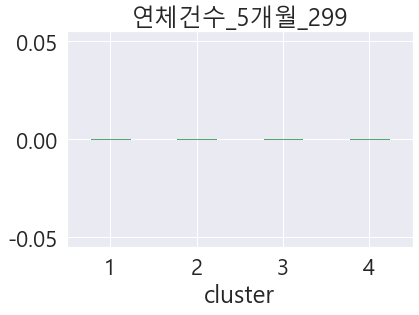

<Figure size 432x288 with 0 Axes>

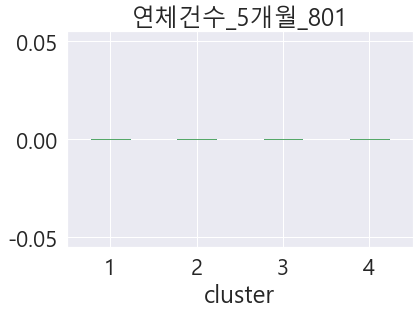

<Figure size 432x288 with 0 Axes>

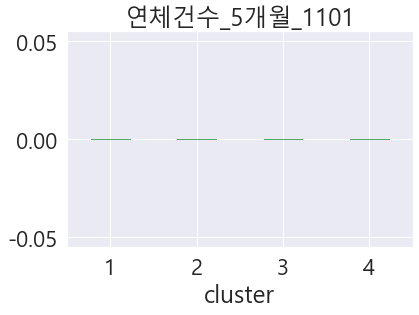

<Figure size 432x288 with 0 Axes>

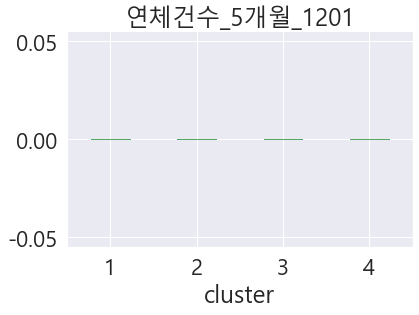

<Figure size 432x288 with 0 Axes>

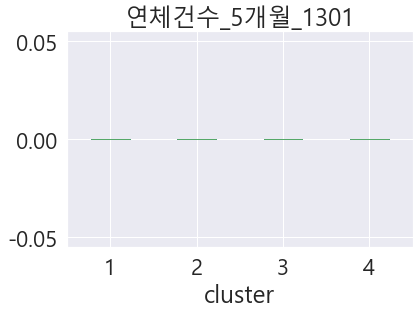

<Figure size 432x288 with 0 Axes>

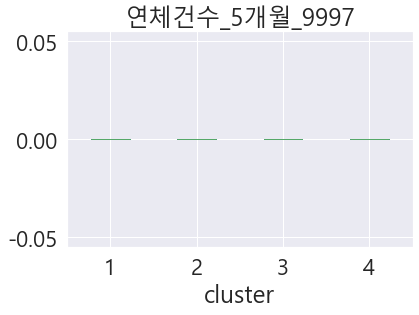

<Figure size 432x288 with 0 Axes>

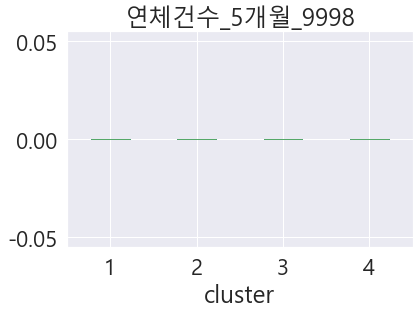

<Figure size 432x288 with 0 Axes>

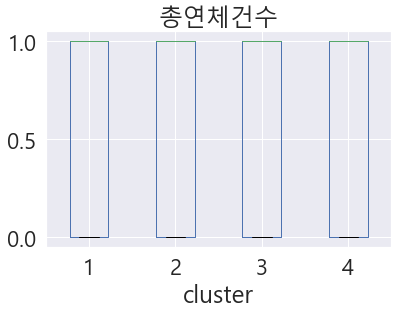

<Figure size 432x288 with 0 Axes>

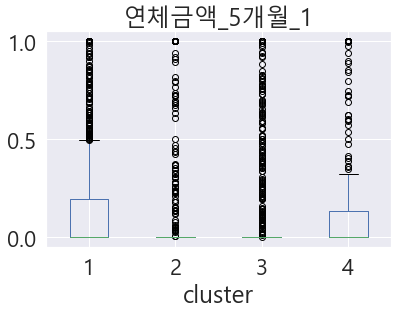

<Figure size 432x288 with 0 Axes>

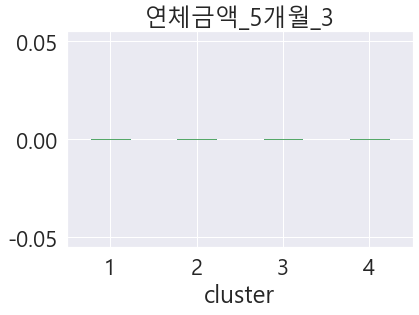

<Figure size 432x288 with 0 Axes>

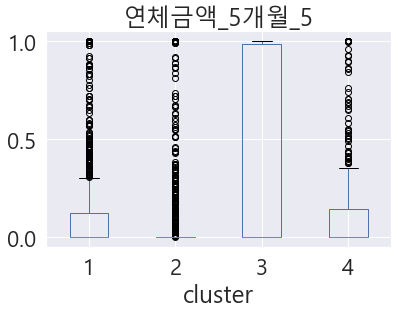

<Figure size 432x288 with 0 Axes>

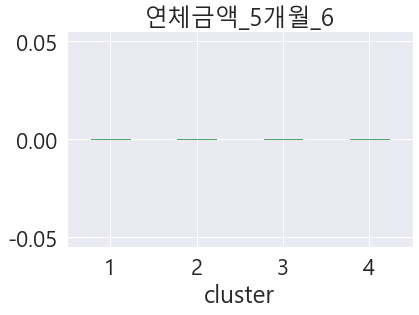

<Figure size 432x288 with 0 Axes>

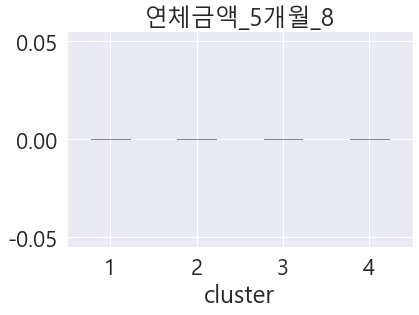

<Figure size 432x288 with 0 Axes>

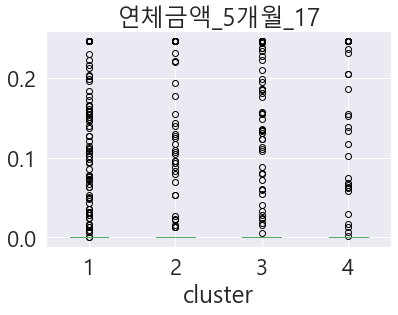

<Figure size 432x288 with 0 Axes>

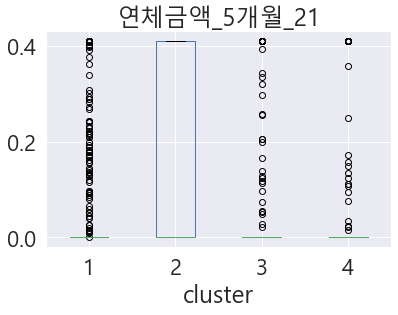

<Figure size 432x288 with 0 Axes>

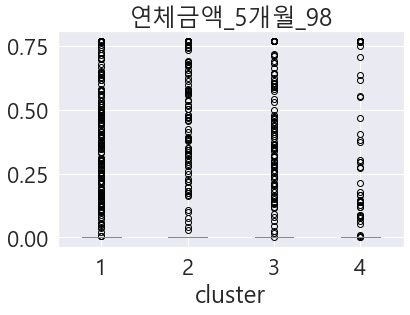

<Figure size 432x288 with 0 Axes>

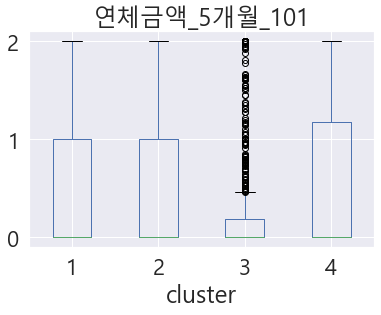

<Figure size 432x288 with 0 Axes>

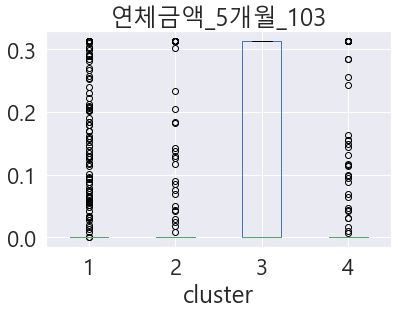

<Figure size 432x288 with 0 Axes>

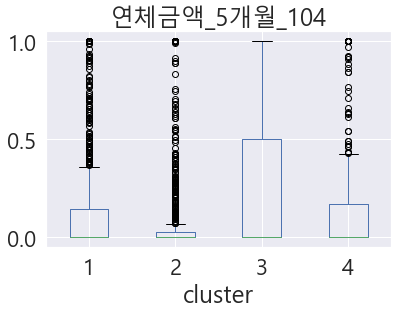

<Figure size 432x288 with 0 Axes>

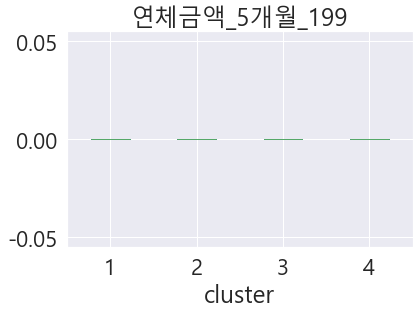

<Figure size 432x288 with 0 Axes>

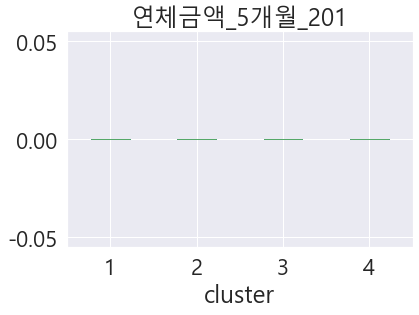

<Figure size 432x288 with 0 Axes>

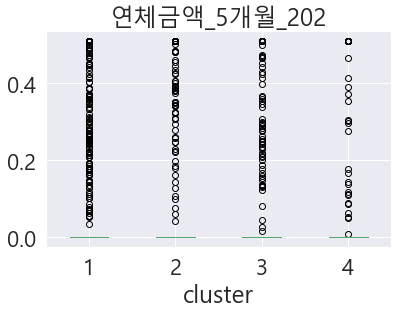

<Figure size 432x288 with 0 Axes>

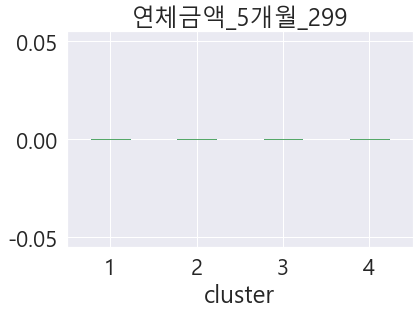

<Figure size 432x288 with 0 Axes>

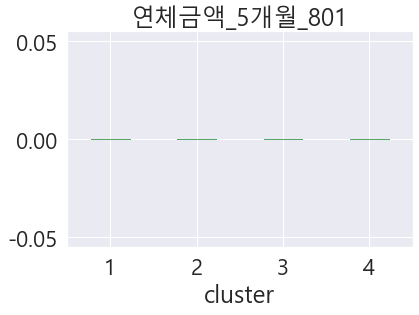

<Figure size 432x288 with 0 Axes>

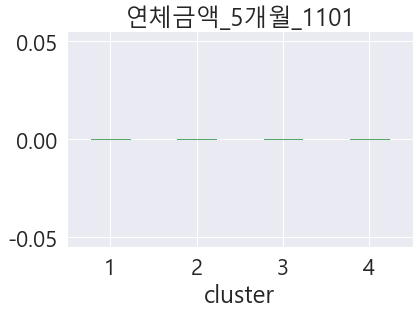

<Figure size 432x288 with 0 Axes>

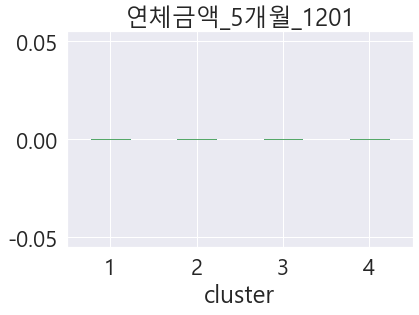

<Figure size 432x288 with 0 Axes>

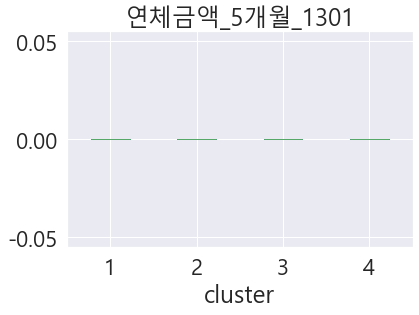

<Figure size 432x288 with 0 Axes>

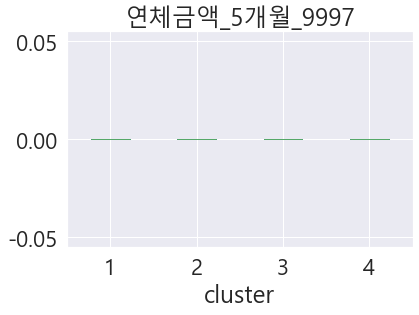

<Figure size 432x288 with 0 Axes>

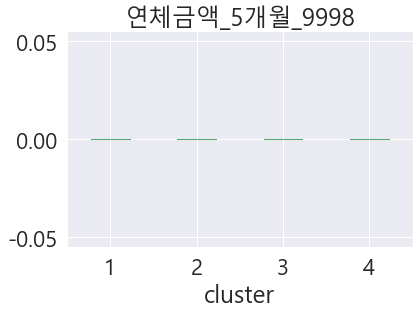

<Figure size 432x288 with 0 Axes>

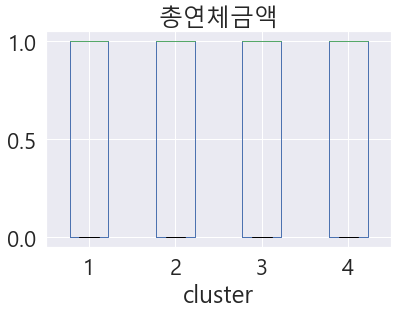

<Figure size 432x288 with 0 Axes>

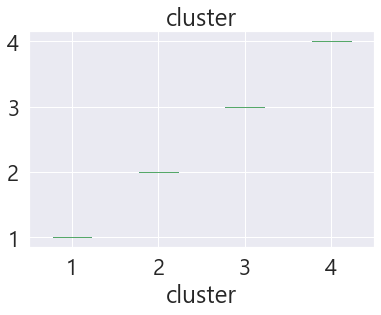

In [533]:
for i in range(1,len(cus.columns)):
    try:
        plt.figure()
        ax = cus.boxplot(column= cus.columns[i], by='cluster')
        plt.suptitle('')
        plt.show()
    except:
        print('')